In [1]:
cd ..

/Users/yanndubois/SSL-Risk-Decomposition


In [2]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [3]:
#!rm -rf /Users/yanndubois/.cache/torch/hub/YannDubs_SSL-Risk-Decomposition_main

# Collect all results

In [4]:
import pandas as pd
from utils.plotting import *
from utils.collect_results import *
from utils.causal import *
import numpy as np
import warnings
import logging
import hubconf
from pathlib import Path

 No module named 'torch'
 No module named 'torch'
 No module named 'torch'
 No module named 'torch'
 No module named 'torch'
 No module named 'torch'
 No module named 'torch'
 No module named 'torch'
 No module named 'torch'
 No module named 'torch'
 No module named 'open_clip'
 No module named 'torch'
 No module named 'torch'
 No module named 'torch'
 No module named 'torch'
 No module named 'torch'
 No module named 'torch'
 No module named 'torch'
 No module named 'torch'
 No module named 'torch'
 No module named 'torch'
 No module named 'torch'
 No module named 'torch'
 No module named 'torch'


In [5]:
df, metadata_df = load_df(is_zero_approx=False)

df_sup = df.query("ssl_mode == 'supervised'")
df_init = df.query("ssl_mode == 'initialized'")
df = df.query("ssl_mode != 'initialized' & ssl_mode != 'supervised'")
df_IN = df.query("pretraining_data == 'ImageNet-1K'")

Found 201 result files to load.


Found missing supervised models for:


,pred,seed,arch
0,torch_linear_delta_hypopt,123,vitb8 4xcls
1,torch_linear_delta_hypopt,123,vitl16 cls+avg
2,torch_linear_delta_hypopt,123,missing
3,torch_linear_delta_hypopt,123,vitl16 4xcls
4,torch_linear_delta_hypopt,123,vitl16 proj+cls
5,torch_linear_delta_hypopt,123,vitl16 4xcls
6,torch_linear_delta_hypopt,123,vitl16 cls+avg
7,torch_linear_delta_hypopt,123,vitl16 proj
8,torch_linear_delta_hypopt,123,missing
9,torch_linear_delta_hypopt,123,missing


[usability] = [train_train] - [sup_train_train]
[probe_gen] = [train-cmplmnt-ntest_train-sbst-ntest] - [train_train]
[enc_gen] = [train_test] - [train-cmplmnt-ntest_train-sbst-ntest]


Found negative values:


,train-cmplmnt-ntest_train-sbst-ntest,train_train,train-cmplmnt-ntest_test,train_test,union_test,sup_train_train,sup_train_test,agg_risk,approx,usability,probe_gen,enc_gen
enc,,,,,,,,,,,,
dino_vitb16_extracts,19.042,0.811,23.680,23.572,NaN,1.548,16.046,23.572,1.548,-0.737,18.231,4.530
dissl_resnet50_d4096_e100_m2,32.994,0.491,32.988,32.846,NaN,0.845,24.244,32.846,0.845,-0.354,32.503,-0.148
dissl_resnet50_d8192_e100_m2,32.276,0.656,33.756,33.578,NaN,0.845,24.244,33.578,0.845,-0.189,31.620,1.302
dissl_resnet50_d8192_e400_m6,24.528,0.464,28.492,28.344,NaN,0.845,24.244,28.344,0.845,-0.381,24.064,3.816
dissl_resnet50_d8192_e800_m8,23.880,0.463,28.138,28.004,NaN,0.845,24.244,28.004,0.845,-0.382,23.417,4.124
init_vitb32,96.200,92.428,NaN,95.864,NaN,1.132,20.204,95.864,1.132,91.296,3.772,-0.336
init_vitl16,93.020,87.061,NaN,92.952,NaN,0.553,15.880,92.952,0.553,86.508,5.959,-0.068
mugs_vitb16_ep400_extracts,17.174,0.584,NaN,20.698,NaN,1.548,16.046,20.698,1.548,-0.963,16.590,3.524
pirl_rn50w2_headmlp,26.080,0.651,NaN,29.502,NaN,0.743,22.102,29.502,0.743,-0.091,25.429,3.422


The following results seem suspicously bad:


,agg_risk
enc,
beit_vitb16_pt22k,57.194


The following models have very different original and evalauted performance:


enc
deepcluster_rn50_bs512_ep200_mmselfsup   -17.566000
dissl_resnet50_dnone_e100_m2               5.037999
jigsaw_rn50                               10.766001
jigsaw_rn50_in22k                         17.584002
msn_vitl16_ep600                           6.359999
rotnet_rn50_in1k                           7.164002
rotnet_rn50_in22k                          7.314002
simclr_rn50_bs256_ep200_mmselfsup          6.275999
speccl_resnet50_bs384_ep100                5.306000
dtype: float64

The following results have some nan:


,approx,usability,probe_gen,enc_gen
enc,,,,
clip_vitl14_px336_extractb,NaN,NaN,12.370,2.094
clip_vitl14_px336_extractpred,NaN,NaN,9.091,1.516
clip_vitl14_px336_extractpredcls,NaN,NaN,11.521,2.138
clip_vitl14_px336_extracts,NaN,NaN,12.183,2.250
dino_vits16_extractb,NaN,NaN,10.441,4.102
dino_vits16_last,NaN,NaN,4.293,3.812
dino_vits8_last,NaN,NaN,4.449,3.818
ibot_vitl16_extractb,NaN,NaN,16.055,2.664
ibot_vitl16_extracts,NaN,NaN,15.083,3.370


In [6]:
dummy_aug = pd.get_dummies(df.augmentations.apply(pd.Series).stack()).groupby(level=0).sum()

ANY_GEOMETRIC = ["crop","flip","rotate","autoaugment"]
ANY_PHOTOMETRIC = ["blur","color","gray","photometric","solarize","autoaugment"]
dummy_aug["anygeometric"] =  dummy_aug[ANY_GEOMETRIC].any(axis=1).astype(int)
dummy_aug["anycolor"] =  dummy_aug[ANY_PHOTOMETRIC].any(axis=1).astype(int)

dummy_aug.rename(columns=dict(autoaugment="autoaug"), inplace=True)
dummy_aug.columns = [f"is_aug_{c}" for c in dummy_aug.columns]

df = pd.merge(left=df,
              right=dummy_aug,
              right_index=True,
              left_index=True)

AUGMENTATIONS = list(dummy_aug.columns)

In [7]:
std = load_all_results(pattern=f"**/seed_*/results_all.csv", 
                           skip_ifneq={}, 
                           skip_ifin=dict(ssl=["swav_rn50w5","selav2_rn50_ep400_2x160_4x96"]))
std = std[std.index.isin(['sk_logistic_hypopt','torch_linear_delta_hypopt'], level=1)]
# CORE_METRICS = ["train_test"
#                ] + [c for c in std.columns 
#                    if c.endswith("_test") and (c.startswith('train-balsbst-ntrain') or c.startswith('train-nperclass-')) ]
CORE_METRICS = ["train_test", "train-nperclass-30_test", "train-balsbst-ntrain0.01_test", "train-nperclass-5_test", "train-nperclass-3_test"]
std = std[CORE_METRICS]
assert not (std.groupby("enc").nunique() > 1).any().any()
std = std.groupby("enc").mean()
#std["delta-100%-1%"] = std["train-balsbst-ntrain0.01_test"] - std["train_test"]
METRICS = CORE_METRICS #+ ["delta-100%-1%"]

Found 1336 result files to load.


In [8]:
print("Following results are missing:")
missing=std[std.isna().any(axis=1)]
missing[[("init" not in i) and ("sup" not in i) for i in missing.index]]

Following results are missing:


,train_test,train-nperclass-30_test,train-balsbst-ntrain0.01_test,train-nperclass-5_test,train-nperclass-3_test
enc,,,,,
openclip_vitg14_extracts,16.400000,NaN,26.936,34.592,40.896
openclip_vith14_extracts,16.103999,NaN,27.568,36.386,43.726


In [9]:
df = pd.merge(left=df,
              right=std[METRICS[1:]],
              right_index=True,
              left_index=True)

df["patch_size"] = df.apply(lambda row: (4 if row["family"] == "convnext" else 7) if pd.isna(row["patch_size"]) else row["patch_size"], axis=1)


# coarsens many different parameters for cleaner plots
#df = preprocess_features(df, round_dict={}, pow_dict={})

#non_core_params = ['date_published','top1acc_in1k_official','projection_nparameters']
core_params = ['objective','version','architecture','patch_size','z_dim','z_layer',
               "epochs","batch_size", "optimizer", "learning_rate", "weight_decay", "scheduler",
               "pretraining_data",'img_size','year',"nviews",'finetuning_data','projection1_arch','projection2_arch','projection_same', 
               "n_augmentations", "other"]#, "pred_dim"
minimal_params = ['objective','version','architecture','patch_size','z_dim','z_layer',"pretraining_data",'finetuning_data']

df_core = df.set_index(core_params)[COMPONENTS]
df_minimal = df.set_index(minimal_params)[COMPONENTS]
df_nona = df[~df[COMPONENTS ].isna().any(axis=1)].copy()
df_IN = df.query("pretraining_data == 'ImageNet-1K'")

CORE_STATISTICS = ['train_rank', "train_uniformity", 'trainrealaug_alignment', "trainrealaug_vars", 
                   "trainrealaug_nc1norm", 'train_rank_Z'  ]
MINI_STATISTICS = ['train_rank', "train_uniformity", 'trainrealaug_alignment', "trainrealaug_vars", "train_rank_Z" ]

to_fit = COMPONENTS + ['train-nperclass-3_test']
melted = melt(df, components=to_fit)
melted_onlyComp = melt(df, components=COMPONENTS_ONLY)
melted_stats = melt(df, components=CORE_STATISTICS)
melted_ministats = melt(df, components=MINI_STATISTICS)
#melted_wdelta = melt(df, components=COMPONENTS+["delta-100%-3shot"])

melted_metrics = pd.melt(melted_onlyComp,
                   value_vars=METRICS,
                   id_vars=[c for c in melted_onlyComp.columns if c not in METRICS],
                   var_name="metric",
                    value_name='metric_value',
                    )

melted_Onlymetrics = pd.melt(melted_onlyComp,
                   value_vars=CORE_METRICS,
                   id_vars=[c for c in melted_onlyComp.columns if c not in CORE_METRICS],
                   var_name="metric",
                    value_name='metric_value',
                    )

In [10]:
from hubconf import metadata_dict
n_hparam = sum([len(v) for k,v in metadata_dict()["simclr_rn101"].items() if k not in ["metrics","meta","compute"]])
n_metadata = sum([len(v) for k,v in metadata_dict()["simclr_rn101"].items() if k in ["metrics","meta","compute"]])
print("Number of hyperparameters:", n_hparam)
print("Number of metadata:", n_metadata)
print("Number of SSL models:", len(df))
print("Number of objectives:", len(df.objective.unique()))
print("Number of architecture:", len((df.architecture + "_"+ df.patch_size.astype(str)).unique()))

Number of hyperparameters: 30
Number of metadata: 9
Number of SSL models: 169
Number of objectives: 28
Number of architecture: 20


Let us save all results 

In [11]:
STATISTICS = [c for c in df.columns 
              if "_var" in c 
              or "_nc1" in c
              or "_rank" in c
              or "_uniformity" in c
              or "_alignment" in c]

RISK_DECOMPOSITION = COMPONENTS_ONLY
meta_names = {k:[el for el in v.keys()] for k,v in metadata_dict(drop_missing=False)["dino_rn50"].items()}
METADATA  = [c for k in ["meta","compute","metrics"] for c in meta_names[k] ] + ["date_published"]
HYPERPARAMETERS = [c for k in ["ssl","model","data","representation","optimization"] for c in meta_names[k] ] + AUGMENTATIONS + ["n_augmentations","nviews","projection_nparameters_hidden"]

all_cols = RISK_DECOMPOSITION + CORE_METRICS + HYPERPARAMETERS + METADATA + STATISTICS
top_cols = ["risk_decomposition"] * len(RISK_DECOMPOSITION) + ["metrics"] * len(CORE_METRICS) + ["hyperparameters"] * len(HYPERPARAMETERS) + ["metadata"] * len(METADATA) + ["statistics"] * len(STATISTICS)

all_results = df[all_cols].copy()
all_results.columns = pd.MultiIndex.from_arrays(([top_cols,  all_results.columns]))
all_results.to_csv("all_results.csv")

## Introduction

Let's plot the dcomposition of (nearly) all results. Note that we only plot the ones that have no NaN.

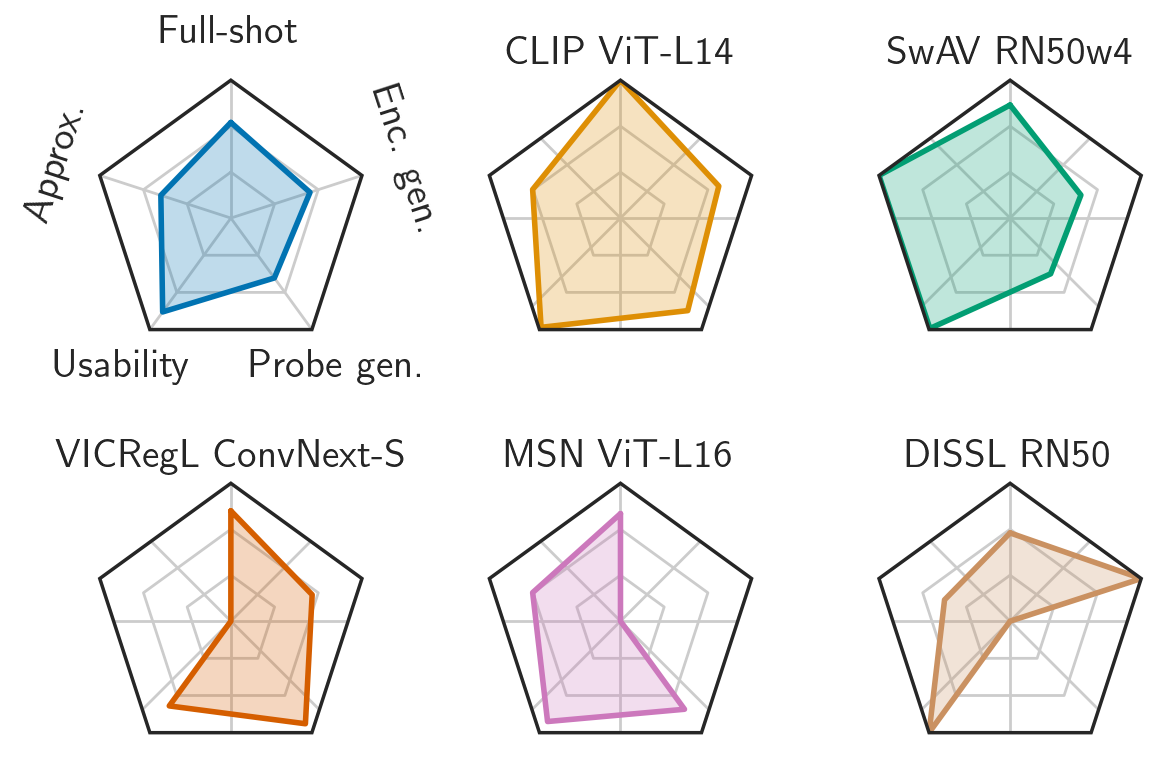

In [12]:
models = ["clip_vitl14_px336","swav_rn50w4","vicregl_convnexts_alpha075","dissl_resnet50_d4096_e100_m2","msn_vitl16_ep600"]
colors = sns.color_palette("colorblind", n_colors=len(models)+1)
isna = df[COMPONENTS].isna().any(axis=1)

save_path="figures/radars/main_radar.pdf"


plot_radar_grid(df[~isna], ncols=3, 
                components=["agg_risk"]+COMPONENTS_ONLY, 
                models=models, 
                save_path=save_path,
                config_kwargs=dict(is_despine=False, font_scale=1, is_use_tex=True),
                space_per_col=2,
                is_plot_rest=False,
                space_per_row=2.1,
                pad_inches=0.03
               )

In [13]:
100-df.loc[models,METRICS]

,train_test,train-nperclass-30_test,train-balsbst-ntrain0.01_test,train-nperclass-5_test,train-nperclass-3_test
enc,,,,,
clip_vitl14_px336,84.990001,78.678,75.224,68.948,62.930
swav_rn50w4,76.240000,62.828,56.196,45.296,36.894
vicregl_convnexts_alpha075,74.888000,65.170,62.528,58.616,55.040
dissl_resnet50_d4096_e100_m2,67.153999,49.224,42.264,33.064,27.180
msn_vitl16_ep600,74.340001,71.694,69.990,66.008,62.700


## Results

### Trends

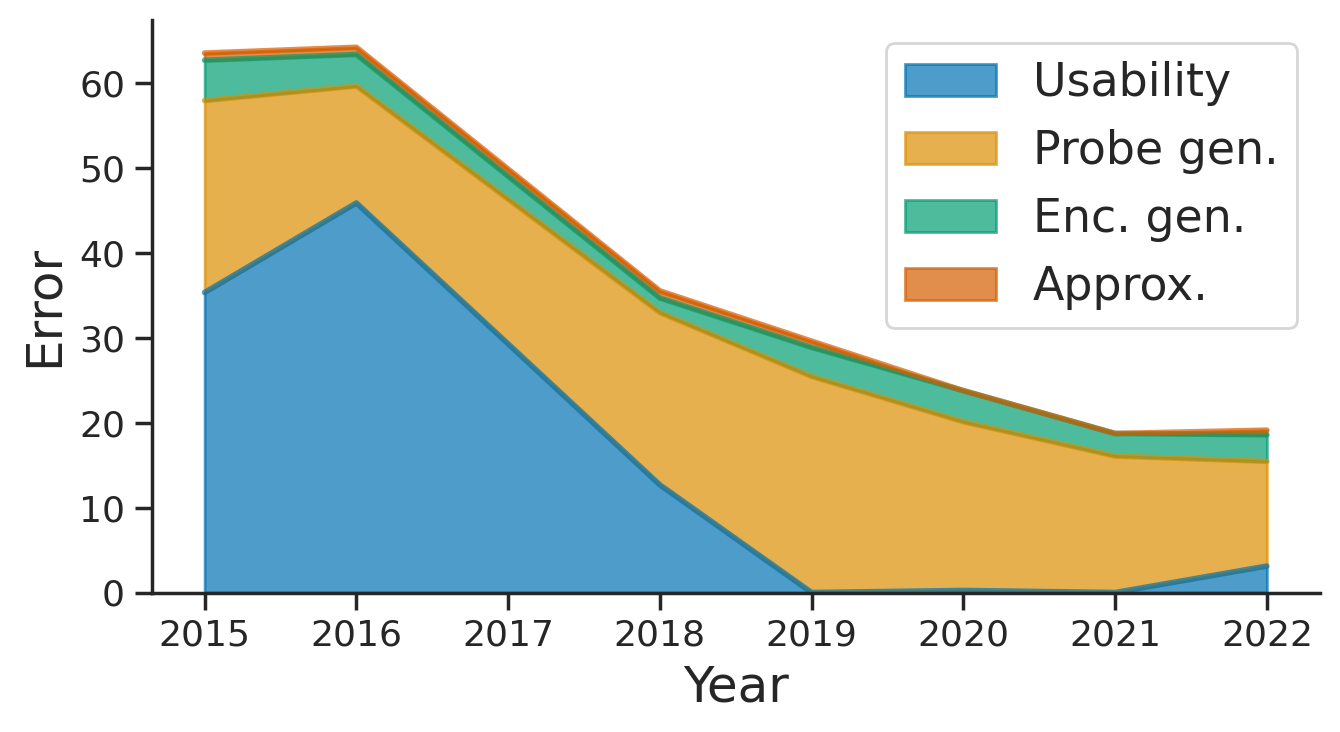

In [14]:
plot_trend(df.query('pretraining_data == "ImageNet-1K" '), 
           is_min=True, figsize=(7, 4),
           save_path="figures/trends/trend_min_noclip.pdf")

### Tradeoffs

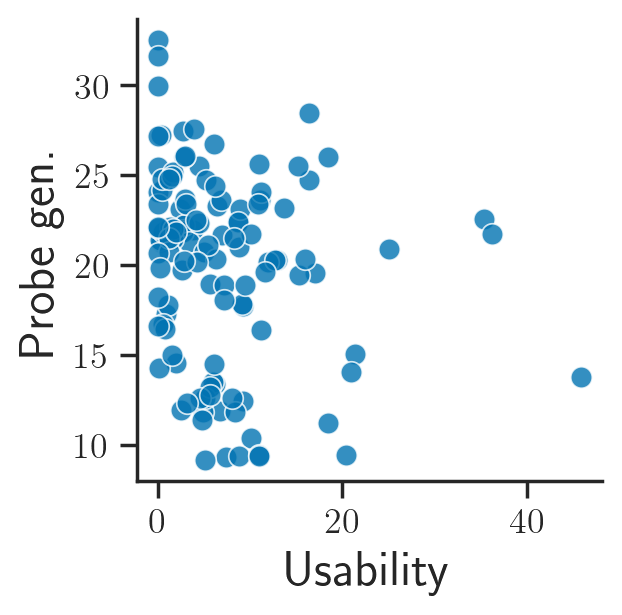

In [15]:

with plot_config(is_use_tex=True, font_scale=1.5, 
                 rc={'lines.linewidth': 2, 'font.family': 'sans-serif',
                     "ytick.labelsize": 13, "xtick.labelsize": 13}):
    fig, ax= plt.subplots(1,1, figsize=(3,3))
    
    g=sns.scatterplot(data=df_IN[COMPONENTS_ONLY+["year"]].rename(columns=PRETTY_RENAMER), 
                      x=PRETTY_RENAMER["usability"], 
                      y=PRETTY_RENAMER["probe_gen"], 
                      ax=ax, s=60, alpha=0.8)
    #g.set_ylim(10,18)
    #g.set_xlim(-1,7)
    #plt.axis('scaled')
    
plt.savefig(f"figures/trends/tradeoff_probe-usability_all.pdf", bbox_inches='tight', pad_inches=0)
    

In [16]:
filter_by_quantile(df_IN, is_year=True, quantile=0.2)[COMPONENTS+["year"]].query("year == 2020")

,approx,usability,probe_gen,enc_gen,agg_risk,year
enc,,,,,,
byol_rn50_bs2048,0.845089,2.718693,21.824217,3.066000,28.454000,2020
byol_rn50_bs4096,0.845089,2.582333,19.720578,3.351998,26.499999,2020
dc2_rn50_ep400_2x160_4x96,0.845089,1.614622,21.436289,3.090000,26.986000,2020
dc2_rn50_ep800_2x224_6x96,0.845089,0.266632,21.302280,3.633998,26.047999,2020
simclr_rn50w2,0.742838,0.000000,22.044087,3.544000,26.060000,2020
swav_rn50,0.845089,1.225836,20.709075,3.292002,26.072001,2020
swav_rn50_ep200,0.845089,1.629452,22.015459,3.069998,27.559999,2020
swav_rn50_ep400,0.845089,1.129439,21.527472,3.129999,26.631999,2020
swav_rn50_ep400_bs256,0.845089,2.766618,20.228292,2.975999,26.815999,2020


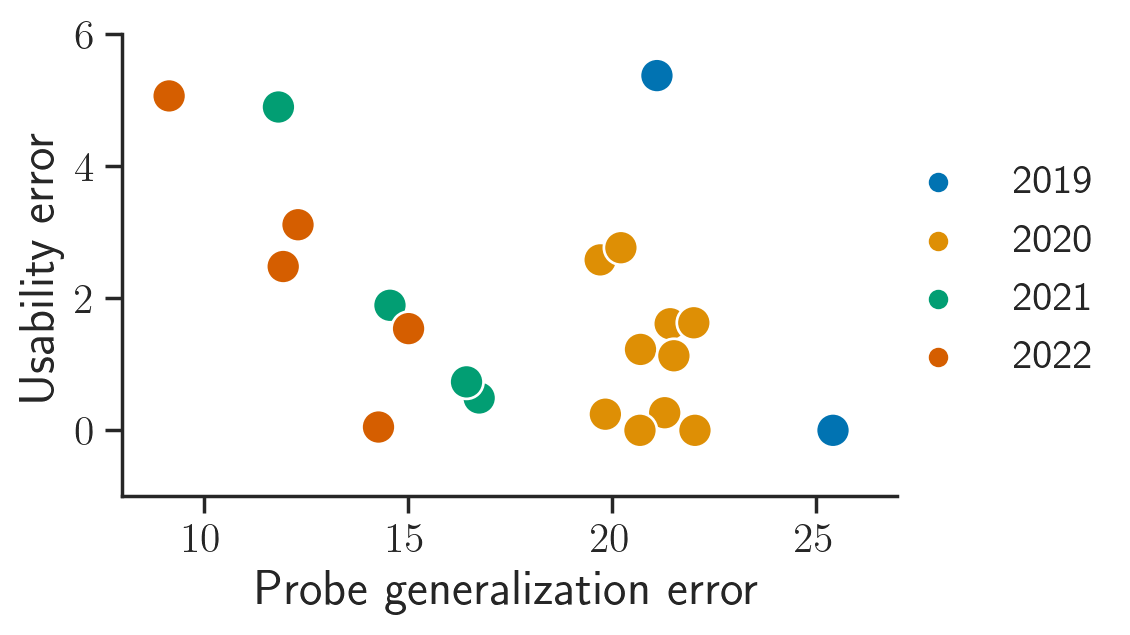

In [17]:

with plot_config(is_use_tex=True, font_scale=1.5, 
                 rc={'lines.linewidth': 2, 'font.family': 'sans-serif',
                     "ytick.labelsize": 15, "xtick.labelsize": 15, "legend.fontsize": 15}):
    fig, ax= plt.subplots(1,1, figsize=(5,3))
    
    data=filter_by_quantile(df_IN, is_year=True, quantile=0.19)[COMPONENTS_ONLY+["year"]].query("year >= 2019").rename(columns=PRETTY_RENAMER)
    data["Year"] = data["Year"].astype("category")
    g=sns.scatterplot(data=data, s=150, 
                      y=PRETTY_RENAMER["usability"], 
                      x=PRETTY_RENAMER["probe_gen"],
                      ax=ax, hue="Year", legend = True)
    #sns.move_legend(ax, "lower center", bbox_to_anchor=(.5, 1), ncol=2, title=None, frameon=False)
    sns.move_legend(ax, "upper left", bbox_to_anchor=(0.95, .8), title=None, frameon=False)

    #g._legend.remove()
    
    #g.set_ylim(10,18)
    
    #plt.axis('scaled')

    
    g.set(ylabel = "Usability error", xlabel = "Probe generalization error", ylim=[-1,6], xlim=[8,27])
    ax.xaxis.set_major_locator(plt.MaxNLocator(4))
    ax.yaxis.set_major_locator(plt.MaxNLocator(4))
    # axes[0].set_ylabel("Usability Error")
    #axes[1].set_ylabel("Probe Gen. Error")
    
plt.savefig(f"figures/trends/tradeoff_probe-usability_year.pdf", bbox_inches='tight', pad_inches=0)
    
    

### Evaluation

**hypothesis** The most important when probe is trained on a lot of data is the usability and for few shot it's probe gen

#### Best performing models vary across settings

In [18]:
df_nona = df[~df[COMPONENTS].isna().any(axis=1)].copy()

In [19]:
df_nona_metric = df[~df[CORE_METRICS].isna().any(axis=1)]
rank_delta = df_nona_metric[CORE_METRICS].sort_values("train_test").copy()
rank_delta["rank_all"] = range(len(rank_delta))
rank_delta = rank_delta.sort_values('train-nperclass-3_test')
rank_delta["rank_3"] = range(len(rank_delta))
rank_delta["rank_delta"] = rank_delta["rank_all"] - rank_delta["rank_3"]
rank_delta["rank_delta_abs"] = rank_delta["rank_delta"].abs()

In [20]:
rank_delta.sort_values("rank_delta_abs",ascending=False).head(10)["rank_delta"]

enc
mae_vith14                   -62
msn_vitl16_ep600              48
mae_vitl16                   -41
clip_rn50x16                 -39
clip_vitl14_px336_extracts   -38
msn_vitl7_ep200_extracts      36
msn_vitb16_ep600              31
clip_rn50x4                  -29
swav_rn50w2                  -28
clip_vitb16                  -27
Name: rank_delta, dtype: int64

In [21]:
compute_correlations(rank_delta["rank_3"],  
                     rank_delta["rank_all"], 
                     correlations=["Kendall"])

Kendall correlation: 0.808 pvalue = 3.10e-54


In [22]:
print(rank_delta["rank_delta_abs"].mean())

11.353293413173652


In [23]:
n= 5
intersection = set(df.sort_values("train_test").head(n).index)
for c in CORE_METRICS:
    curr_best = df.sort_values(c).head(n).index
    intersection = intersection.intersection(set(curr_best))
    print(df.sort_values(c).head(n)[c])
    print()

print(f"Only {len(intersection)} of the best {n} models intersect {intersection}")

enc
clip_vitl14_px336_extracts          14.926000
clip_vitl14_px336_extractpredcls    14.950000
clip_vitl14_px336_extractb          14.951999
clip_vitl14_px336                   15.009999
clip_vitl14_px336_extractpred       15.102001
Name: train_test, dtype: float64

enc
openclip_vith14_extractpred         20.642
openclip_vith14                     20.934
clip_vitl14_px336_extractpred       21.026
clip_vitl14_px336_extractpredcls    21.114
openclip_vith14_extractb            21.134
Name: train-nperclass-30_test, dtype: float64

enc
openclip_vith14_extractpred      23.544
openclip_vitg14_extractpred      24.118
clip_vitl14_px336_extractpred    24.138
openclip_vith14                  24.228
openclip_vith14_extractb         24.478
Name: train-balsbst-ntrain0.01_test, dtype: float64

enc
msn_vitl7_ep200             27.632
msn_vitb4_ep300             27.688
msn_vitl7_ep200_extracts    28.294
msn_vitl7_ep200_extractb    29.084
mugs_vitl16_ep250           29.222
Name: train-nperclass-5_test, 

#### Probe gen signals sample efficiency

In [24]:
n= round(len(df)*0.2) # 1%
comp_vs_samples = dict()
for c in CORE_METRICS:
    print(f"best {c}: ", df_nona[CORE_METRICS].sort_values(c).iloc[0].name )
    comp_vs_samples[c] = df_nona[[c]+COMPONENTS_ONLY].sort_values(c).head(n).mean()[COMPONENTS_ONLY]
    #display(df_nona[[c]+COMPONENTS_ONLY].sort_values(c).head(n).mean().to_frame().T[COMPONENTS_ONLY])


best train_test:  clip_vitl14_px336
best train-nperclass-30_test:  openclip_vith14
best train-balsbst-ntrain0.01_test:  openclip_vitg14_extractpred
best train-nperclass-5_test:  msn_vitl7_ep200
best train-nperclass-3_test:  msn_vitl7_ep200


In [25]:
comp_vs_samples = pd.DataFrame(comp_vs_samples).T
#comp_vs_samples /= comp_vs_samples.loc["train_test"]
comp_vs_samples = pd.melt(comp_vs_samples.rename(index=PRETTY_RENAMER,columns=PRETTY_RENAMER),
                        value_vars=["Usability","Probe gen."],
                       ignore_index=False).reset_index()

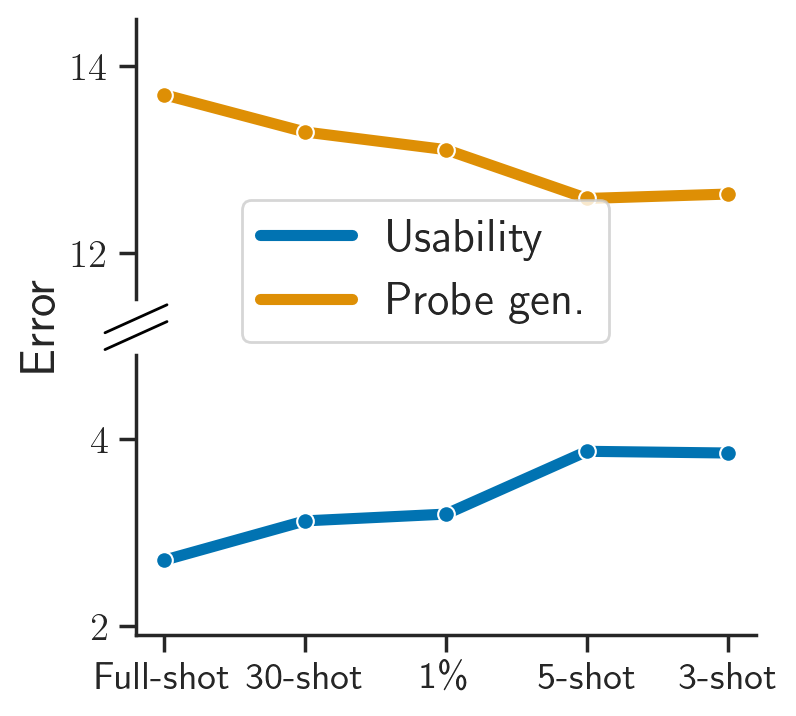

In [26]:
with plot_config(is_use_tex=True, 
                 rc={'lines.linewidth': 4,
                     "ytick.labelsize": 14, "xtick.labelsize": 14}):
    f, (ax1, ax2) = plt.subplots(ncols=1, nrows=2, sharex=True, figsize=(4,4))
    sns.lineplot(comp_vs_samples, x="index", y="value", ax=ax1, 
                       hue="variable", marker="o", legend=True)
    if ax1.legend() is None:
        ax1.legend().set_title(None)
    
    sns.lineplot(comp_vs_samples, x="index", y="value", ax=ax2, 
                       hue="variable", marker="o", legend=False)
    # if ax2.legend() is None:
    #     ax2.legend().set_title(None)
        
    ax1.set_ylim(11.5, 14.5)
    ax2.set_ylim(1.9, 4.9)
    
    
    ax1.set_ylabel("")
    
    ax2.set_ylabel("")
    
    f.text(-0.02, 0.5, "Error", va="center", rotation="vertical")
    
    d = .05  # how big to make the diagonal lines in axes coordinates
    eps=0.13
    # arguments to pass to plot, just so we don't keep repeating them
    kwargs = dict(transform=ax1.transAxes, color="k", clip_on=False, linewidth=1)
    ax1.plot((-d, +d), (-d-eps, +d-eps), **kwargs)        # top-left diagonal
    #ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

    kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
    ax2.plot((-d, +d), (1 - d+eps, 1 + d +eps), **kwargs)  # bottom-left diagonal
    #ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal
    
    ax1.yaxis.set_major_locator(plt.MaxNLocator(1))
    ax2.yaxis.set_major_locator(plt.MaxNLocator(1))
    ax2.set_xlabel("")
    plt.subplots_adjust(hspace=0.2)
    
    sns.move_legend(ax1, "center right", bbox_to_anchor=(0.3, -0.15, 0.5, 0.5))
    
#plt.tight_layout()
ax1.get_xaxis().set_visible(False)
ax1.spines['bottom'].set_visible(False)
plt.savefig(f"figures/evaluation/evaluation_tradeoff.pdf",  bbox_inches='tight', pad_inches=0.1) 

In [27]:
# with plot_config(is_use_tex=True, 
#                  rc={'lines.linewidth': 3,
#                      "ytick.labelsize": 13, "xtick.labelsize": 13}):
#     fig, ax= plt.subplots(1,1, figsize=(4,4))
    
#     g=sns.lineplot(comp_vs_samples, x="index", y="value", ax=ax, 
#                    hue="variable", marker="o")
#     g.legend().set_title(None)
#     g.set(xlabel="Probe's training samples", 
#           ylabel="Relative component of best models")

    

#### Risk components predict performance across settings.

In [28]:
data = melt(df_nona.reset_index(), components=CORE_METRICS, var_name="metrics")
data["n_samples"] = [get_sample_size(m) for m in data["metrics"]]
data["objective"] = data["objective"].replace("clip+eb","lossyless")
data["n_params_probe"] = data["z_dim"]*1000
data = data[~data["value"].isna()]
print(f"Standard deviation to explain: {data['value'].std():.2f}")

data.groupby("metrics")['value'].std().to_frame().T

test_kwargs = dict(#test_mask = data["metrics"].isin(["train-nperclass-5_test","train-nperclass-30_test"]),
                   test_size=2*len(data["enc"].unique()),
                    stratify="enc"
                  )
N = data["n_samples"].max() -  50000 # n trainig samples for probe gen

Standard deviation to explain: 18.87


In [29]:
def f_pred_our2b(params, data, model_var):
    return (data["enc_gen"] +  (1-params["B"])*data["train_train"]+ (params["B"] *data["train_train"]  + data["probe_gen"]) * ( N/params["n_samples"])**params["alpha"]).clip(0,100)

kwargs = dict(f_pred = f_pred_our2b, possible_params = [ "alpha","B"], independent_vars = ["n_samples"])
results_2param = scalinglaw(data, **kwargs) 

*Train* RMSE: 4.3383. R2: 0.9471
*Test* RMSE: 4.3383. R2: 0.9471


metrics,train-balsbst-ntrain0.01_test,train-nperclass-30_test,train-nperclass-3_test,train-nperclass-5_test,train_test
rmse,4.324886,3.654147,6.035283,5.056271,0.137812
r2,0.926385,0.937878,0.866668,0.908242,0.999795
mse,0.073111,0.061694,0.132419,0.091130,0.000203


param              B     alpha
value mean  0.509883  0.145343
      sem        NaN       NaN

N param: 2


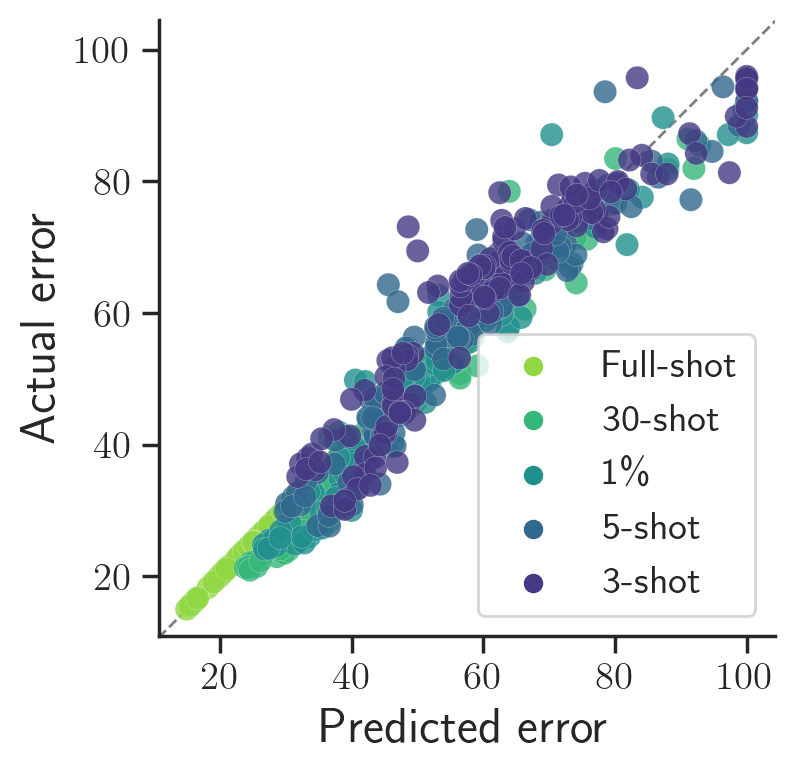

In [30]:
results = results_2param
with plot_config(is_use_tex=True, font_scale=1.5, 
                 rc={'lines.linewidth': 2, "ytick.labelsize": 14, "xtick.labelsize": 14,
                     "legend.fontsize": 14,
                    
                    }):
    fig, ax= plt.subplots(1,1, figsize=(4,4))
    
    tmp=pd.DataFrame({"Predicted error":results.eval(),
                     "Actual error":results.data,
                     "Samples":[PRETTY_RENAMER[m] for m in data["metrics"]]})
    g=sns.scatterplot(tmp, x="Predicted error", y="Actual error", ax=ax, hue="Samples",alpha=0.8, linewidth=0.1,
                   palette="viridis_r",s=70)#, hue_norm=SymLogNorm(linthresh=1,base=2),)
    g.legend_.set_title(None)
    #sns.move_legend(ax, "upper left")
    #g.set(xscale="log", yscale="log")
    
    #ax.set_xlim([0,100])
    #ax.set_ylim([0,100])
    ax.axis("square")
    #plt.xscale('log')
    #plt.yscale('log')
    
    # plot x=y
    lims = [np.min([ax.get_xlim(), ax.get_ylim()]),  np.max([ax.get_xlim(), ax.get_ylim()])]
    ax.plot(lims, lims, 'k--', alpha=0.5, zorder=0, linewidth=1)
    
plt.savefig("figures/evaluation/evaluation_scalinglaw.pdf", bbox_inches='tight', pad_inches=0.1)

In [31]:
def f_pred_our1(params, data, model_var):
    return (data["enc_gen"] + data["train_train"]  + data["probe_gen"] * ( N/params["n_samples"])**params["alpha"]).clip(0,100)


In [32]:
%%time
from IPython.utils import io
enc_unique = data["enc"].unique()
np.random.seed(123)
all_test_kwargs = {"Random": dict(test_size=3*len(enc_unique), stratify="enc"),
                   "Samples" :dict(test_mask = data["metrics"].isin(["train-nperclass-5_test","train-nperclass-30_test"])),
                   "2022" : dict(test_mask = data["year"].isin([2022])),
                   "Encoder": dict(test_mask =  data["enc"].isin(np.random.choice(enc_unique, size=int(0.5*len(enc_unique))))),
                "Cntr." : dict(test_mask = data["ssl_mode"].isin(["contrastive"])),
                "ViT" : dict(test_mask  = data["family"].isin(["vit"])),
                   "ResNet" : dict(test_mask  = data["family"].isin(["resnet"])),
                   "Gen." : dict(test_mask = data["ssl_mode"].isin(["generative"])),
                  }

all_scalinglaws = {"Std": dict(f_pred = f_pred_param, possible_params = ["Irr", "C", "alpha","K","beta"], independent_vars = ["n_samples","n_params_probe"]),
                       "\ \ e=family" : dict(f_pred = f_pred_param, possible_params = ["Irr", "C", "alpha","K","beta"], independent_vars = ["n_samples","n_params_probe"], model_dep=["Irr", "C", "alpha"], model_col="family"),
                    "\ \ e=arch." : dict(f_pred = f_pred_param, possible_params = ["Irr", "C", "alpha","K","beta"], independent_vars = ["n_samples","n_params_probe"], model_dep=["Irr", "C", "alpha"], model_col="architecture"),
                    "\ \ e=obj." : dict(f_pred = f_pred_param, possible_params = ["Irr", "C", "alpha","K","beta"], independent_vars = ["n_samples","n_params_probe"], model_dep=["Irr", "C", "alpha"], model_col="objective"),
                    "\ \ e=enc." : dict(f_pred = f_pred_param, possible_params = ["Irr", "C", "alpha","K","beta"], independent_vars = ["n_samples","n_params_probe"], model_dep=["Irr", "C", "alpha"], model_col="enc"),
                   "Ours": dict(f_pred = f_pred_our2b, possible_params = [ "alpha","B"], independent_vars = ["n_samples"]),
                     "Ours 1" : dict(f_pred = f_pred_our1, possible_params = [ "alpha"], independent_vars = ["n_samples"]),  
                  }

all_results = dict()


    

for k_sl, v_sl in all_scalinglaws.items():
    all_results[k_sl] = dict()
    for k_test, v_test in all_test_kwargs.items():

        try:
            with io.capture_output() as captured:
                model, test_res = scalinglaw(data,
                                           is_return_results=True,
                                           **v_test,
                                           **v_sl)
                r2 = test_res["r2"]
                all_results[k_sl]["n_param"] = len(model.params)
        except ValueError as e:
            r2 = None

        
        all_results[k_sl][k_test] = r2      
    
all_results["test_perc"] = dict()
for k_test, v_test in all_test_kwargs.items():
    n_test = v_test["test_size"] if "test_size" in v_test else v_test["test_mask"].sum()
    all_results["test_perc"][k_test] =  n_test/len(data)



CPU times: user 2min 9s, sys: 1min 15s, total: 3min 24s
Wall time: 2min 8s


In [33]:
all_results_df=pd.DataFrame(all_results).T
all_results_df["n_param"] = all_results_df["n_param"].astype(pd.Int64Dtype())
all_results_df = all_results_df[["Random","2022","Cntr.","ViT","n_param"]] #"Encoder",,"Samples","n_param","ViT",
all_results_df = all_results_df.set_index("n_param", append=True)

In [34]:
print(all_results_df.style.format(precision=2, na_rep="").to_latex(
                                   hrules=True, 
                                   label="tab:scaling_laws",
                                    position="h",
    
                            ))

\begin{table}[h]
\label{tab:scaling_laws}
\begin{tabular}{llrrrr}
\toprule
 &  & Random & 2022 & Cntr. & ViT \\
 & n_param &  &  &  &  \\
\midrule
Std & 5 & 0.33 & -0.41 & 0.42 & -1.24 \\
\ \ e=family & 11 & 0.62 &  & 0.73 &  \\
\ \ e=arch. & 44 & 0.66 &  &  &  \\
\ \ e=obj. & 86 & 0.84 &  &  &  \\
\ \ e=enc. & 440 & 0.97 &  &  &  \\
Ours & 2 & 0.95 & 0.92 & 0.96 & 0.85 \\
Ours 1 & 1 & 0.91 & 0.87 & 0.93 & 0.73 \\
test_perc & <NA> & 0.60 & 0.28 & 0.39 & 0.30 \\
\bottomrule
\end{tabular}
\end{table}



### Effect of hyperparameters

In [35]:
# resnet can be seen like a model with patch_size = kernel of first conv
# resnet can be seen as having of kernel_size
inp = melted.copy()
inp["finetuning_data"] = inp["finetuning_data"].fillna("Na")
inp.projection2_arch = inp.projection2_arch.fillna(inp.projection1_arch).fillna("Na")
melted_stats["finetuning_data"] = melted_stats["finetuning_data"].fillna("Na")
melted_stats.projection2_arch = melted_stats.projection2_arch.fillna(melted_stats.projection1_arch).fillna("Na")

df_pre = preprocess_features(df)

In [36]:
to_fit = COMPONENTS + ['train-nperclass-3_test']
xgbs = dict()
studys = dict()
Xs = dict() 
ys = dict() 
rmses = dict()

In [37]:
prfx="all"
features_to_keep=['objective','architecture','patch_size','z_dim','z_layer',
               "epochs","batch_size", "optimizer", "learning_rate", "weight_decay", "scheduler", "projection_nparameters_hidden",
               "pretraining_data",'img_size','year',"nviews",'finetuning_data','projection1_arch','projection2_arch','projection_same', 
               "n_augmentations", "other", "n_negatives", "pred_dim","ssl_mode","is_ema","family","architecture_exact","n_parameters",
                 "is_stopgrad", "is_aug_invariant", "is_official", "is_industry", "n_classes", "projection_hid_width", "projection_hid_depth"
                 ] + AUGMENTATIONS

xgbs[prfx], studys[prfx], Xs[prfx], ys[prfx], rmses[prfx] =  get_all_xgb(to_fit, df_pre,  
                                                                         features_to_keep, 
                                                                         prfx=prfx, 
                                                                         is_train=False)

In [38]:
prfx="min"
features_to_keep= ["objective","architecture",'patch_size',"epochs",'pretraining_data','projection2_arch', 
                  "nviews", 'z_dim', "family", "ssl_mode",
                   "n_parameters", "n_augmentations","optimizer",
                   "projection_nparameters_hidden"] 


xgbs[prfx], studys[prfx], Xs[prfx], ys[prfx], rmses[prfx] =  get_all_xgb(to_fit, df_pre,  features_to_keep, 
                                                                        prfx=prfx, 
                                                                        is_train=False)

In [39]:
prfx="nano"
features_to_keep= ['patch_size',"epochs",'pretraining_data','projection2_arch', 
                 'finetuning_data', "nviews", 'z_dim', "family", "ssl_mode",
                   "n_parameters", "optimizer","projection_nparameters_hidden",
                   "n_augmentations"] 


xgbs[prfx], studys[prfx], Xs[prfx], ys[prfx], rmses[prfx] =  get_all_xgb(to_fit, df_pre,  features_to_keep, 
                                                                        prfx=prfx, 
                                                                        is_train=False)

In [40]:
components_to_plot=['usability', 'probe_gen']
metrics_to_plot=to_fit[-2:]
components_tomain=components_to_plot+metrics_to_plot

In [41]:
import copy
df_shaps = {}
df_shap = {}
df_shaps_tofit = {}
df_shap_tofit={}
df_shaps_main = {}
df_shap_main={}
df_shap_metrics={}
df_shaps_metrics={}
shap_values = {}
curr_df = convert_type_cols(df, is_use_bool=True)
                
for x in ["min","all","nano"]:
    df_shaps[x] = dict()
    shap_values[x] = dict()
    df_shaps_tofit[x] = dict()
    df_shaps_main[x] = dict()
    df_shaps_metrics[x] = dict()
    
    for o in to_fit:
        df_shaps_tofit[x][o], _ = get_df_shap(xgbs[x][o], Xs[x][o], ys[x][o], 
                                              normalize_by=df[o].mean(), 
                                              df=curr_df.dropna(subset=[o]))
        df_shaps_tofit[x][o]["component"] = o
        
    for o in components_tomain:
        df_shaps_main[x][o], _ = get_df_shap(xgbs[x][o], Xs[x][o], ys[x][o], 
                                              normalize_by=df[o].mean(), 
                                              df=curr_df.dropna(subset=[o]))
        df_shaps_main[x][o]["component"] = o
        
    for o in metrics_to_plot:
        df_shaps_metrics[x][o], _ = get_df_shap(xgbs[x][o], Xs[x][o], ys[x][o], 
                                              normalize_by=df[o].mean(), 
                                              df=curr_df.dropna(subset=[o]))
        df_shaps_metrics[x][o]["component"] = o
        
    for o in components_to_plot:

        df_shaps[x][o], shap_values[x][o] = get_df_shap(xgbs[x][o], Xs[x][o], ys[x][o], 
                                                        normalize_by=df[o].mean(), 
                                                        df=curr_df.dropna(subset=[o]))
        df_shaps[x][o]["component"] = o
        
    
    
    df_shap[x] = pd.concat(df_shaps[x])
    df_shap_tofit[x] = pd.concat(df_shaps_tofit[x])
    df_shap_main[x] = pd.concat(df_shaps_main[x])
    df_shap_metrics[x] = pd.concat(df_shaps_metrics[x])

#### Dimension

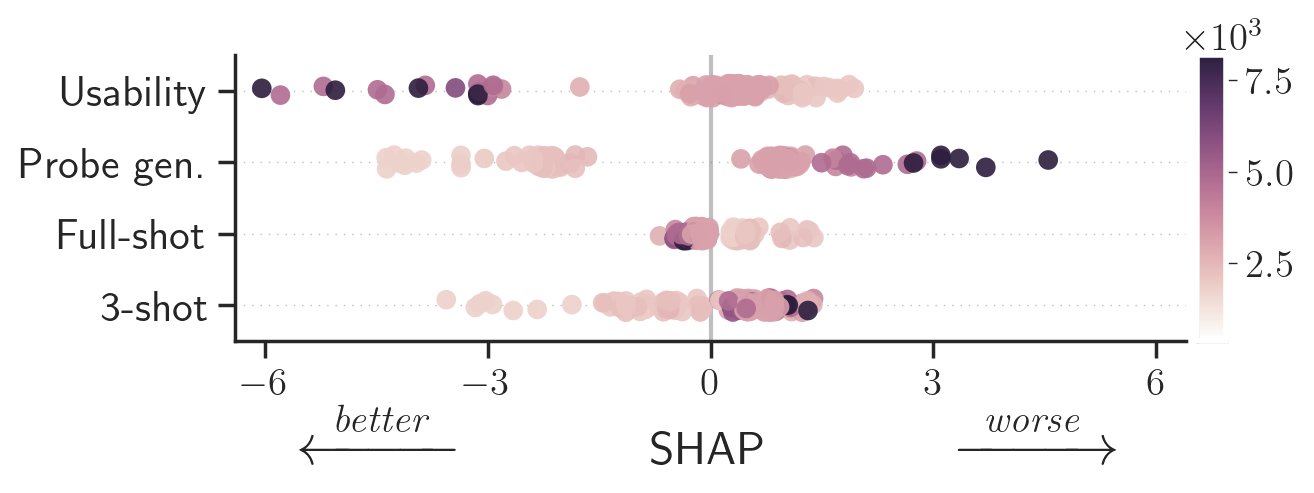

<Figure size 640x480 with 0 Axes>

In [42]:
import matplotlib as mpl
rc={'lines.linewidth': 2, "xtick.labelsize": 14, "legend.fontsize": 14,  "text.latex.preamble": r'\usepackage{amsmath}'}
with plot_config(font_scale=1.4, is_use_tex=True,  rc=rc):
    
    g, other=plot_shap_components("z_dim", df_shap_main["min"], config_kwargs=dict(is_use_tex=True), 
                           rc=rc, s=50, aspect=3, height=2.5, is_colorbar=True, alpha=0.9)

    g.set(xlabel=r"{\huge $\xleftarrow{\ \mathit{better} \ } $} \hspace*{2cm} SHAP \hspace*{2cm}  {\huge $\xrightarrow{\ \mathit{worse} \ } $}",
         xlim=[-6.4,6.4])


    other["colorbar"].formatter.set_powerlimits((0, 0))
    other["colorbar"].ax.yaxis.offsetText.set_fontsize(14)
    other["colorbar"].ax.yaxis.offsetText.set(ha="center")
    g.ax.xaxis.set_major_locator(plt.MaxNLocator(5))
    plt.show()
    
    save_fig(g, "figures/dimensionality/dim_shap.pdf")

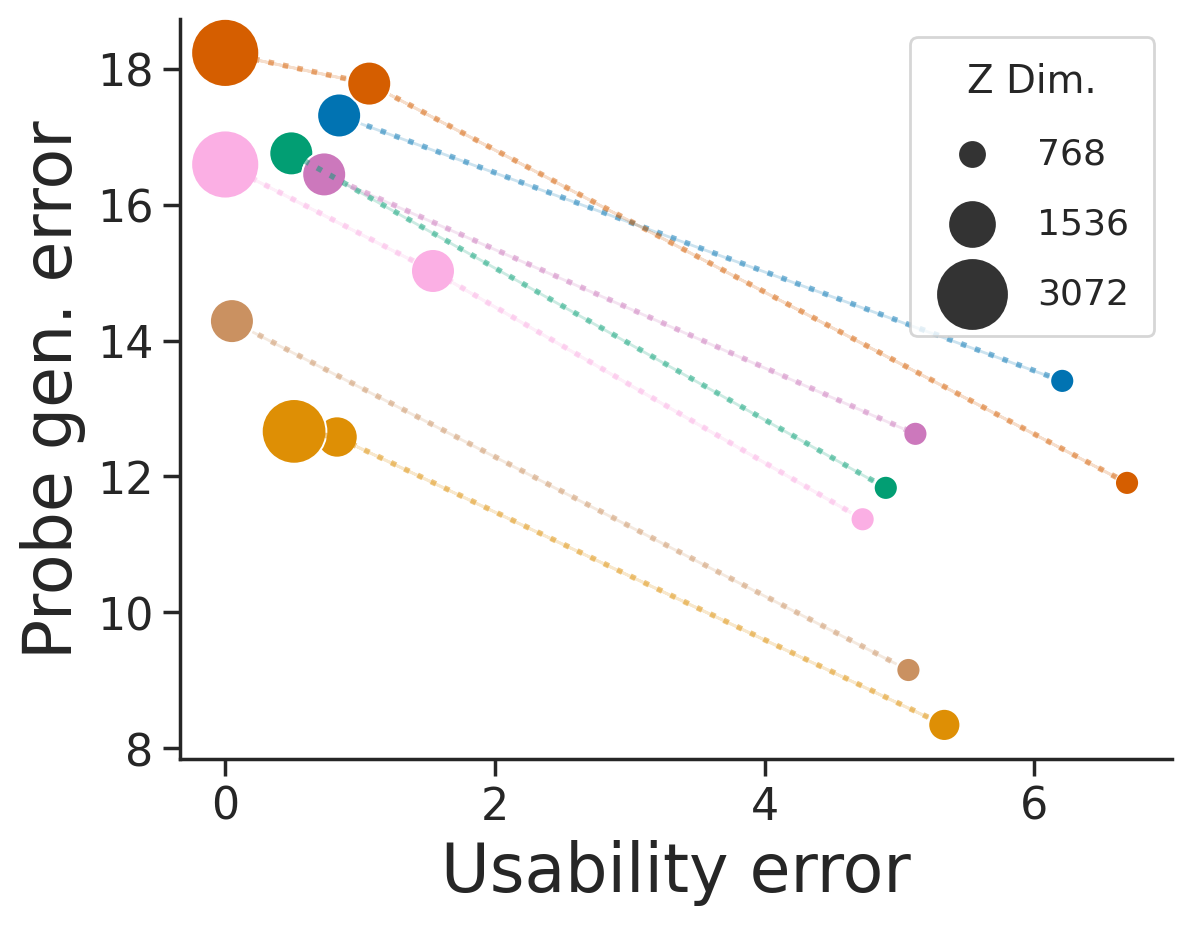

In [43]:
curr_df = df.copy()
curr_df["name"] = [n.split("_extract")[0].split("_last")[0] for n in curr_df.index]

df_zlayer = get_only_vary(curr_df.dropna(subset=["usability","probe_gen"]), 
                          ["z_dim","z_layer","name"], core_params+["name"]).query("family == 'vit'").query("z_dim < 4000")

with plot_config(font_scale=2, rc={"legend.fontsize": 13, "legend.title_fontsize": 14, "ytick.labelsize": 16, "xtick.labelsize": 16}):

    g=sns.lineplot(data=prettify_df(df_zlayer), 
                      x=PRETTY_RENAMER["usability"], 
                      y=PRETTY_RENAMER["probe_gen"], 
                      legend=False,
                      linestyle=':',
                   linewidth=2,
                   alpha=0.5,
                      hue=PRETTY_RENAMER["non_vary"],
                 )
    g=sns.scatterplot(data=prettify_df(df_zlayer), 
                      x="Usability", 
                      y="Probe gen.", 
                      size=PRETTY_RENAMER["z_dim"],
                      legend=True,
                      hue=PRETTY_RENAMER["non_vary"],
                      #hue_norm=SymLogNorm(linthresh=1,base=2),
                      sizes=(75, 600),
                      #size_norm=LogNorm()
                 )
    
    g.set(xlabel="Usability error", ylabel="Probe gen. error")
    
    h,l = g.get_legend_handles_labels()
    
    title = 'Z dim.'
    #dims = ["1000","2000","3000"]
    dims = ["768","1536","3072"]
    h = [h[l.index(d)] for d in dims]
    l = [l[l.index(d)] for d in dims]
    plt.legend(h,l, fancybox=True, title=title, labelspacing = 1, borderpad=0.7)#,ncol=3, loc='upper center',
    g.xaxis.set_major_locator(plt.MaxNLocator(4))
    
plt.show()
save_fig(g, "figures/dimensionality/main_dim_tradeoff_components.pdf")




In [44]:
curr_df = df.query("objective== 'clip' & architecture == 'vith' ")[METRICS+["is_our_extract","z_dim"]].copy()
curr_df[METRICS] = 100 - curr_df[METRICS]
curr_df

,train_test,train-nperclass-30_test,train-balsbst-ntrain0.01_test,train-nperclass-5_test,train-nperclass-3_test,is_our_extract,z_dim
enc,,,,,,,
openclip_vith14,84.412000,79.066,75.772,69.372,63.700,False,1280
openclip_vith14_extractb,84.270000,78.866,75.522,69.478,63.910,True,2560
openclip_vith14_extractpred,84.270000,79.358,76.456,70.756,65.454,True,1024
openclip_vith14_extracts,83.896001,NaN,72.432,63.614,56.274,True,5120


In [45]:
curr_df = df.query("objective== 'mugs' & architecture == 'vits' ")[METRICS+["is_our_extract","z_dim"]].copy()
curr_df[METRICS] = 100 - curr_df[METRICS]
curr_df

,train_test,train-nperclass-30_test,train-balsbst-ntrain0.01_test,train-nperclass-5_test,train-nperclass-3_test,is_our_extract,z_dim
enc,,,,,,,
mugs_vits16_ep100,74.169999,65.624,61.778,56.136,51.320,True,384
mugs_vits16_ep300,76.632001,69.178,65.782,60.670,56.116,True,384
mugs_vits16_ep800,76.992001,70.308,66.600,62.088,57.888,True,384
mugs_vits16_ep800_extracts,77.310000,67.802,62.872,55.884,49.642,False,1536


#### Number of views 

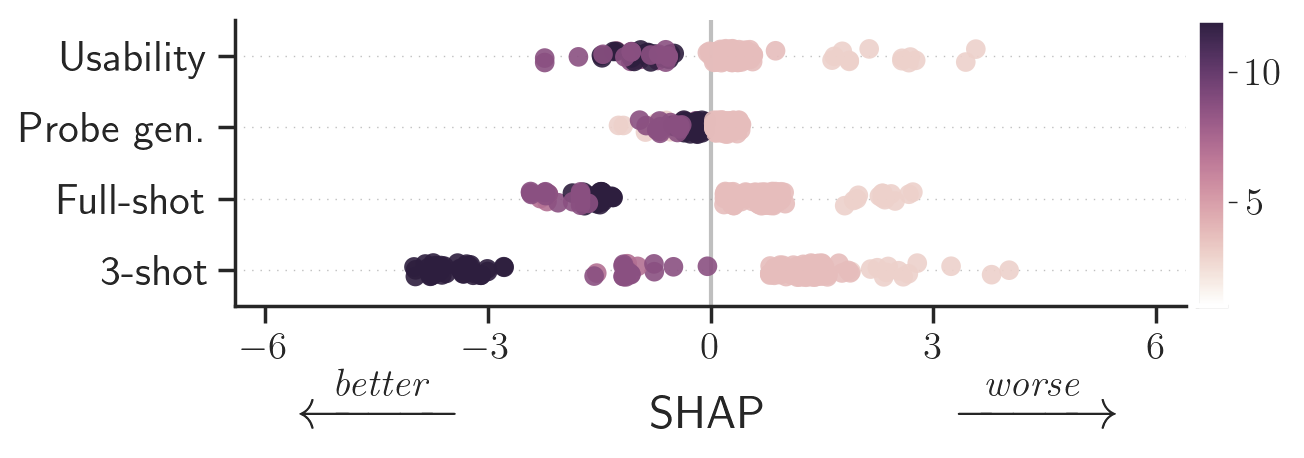

<Figure size 640x480 with 0 Axes>

In [46]:
import matplotlib as mpl

rc={'lines.linewidth': 2, "xtick.labelsize": 14, "legend.fontsize": 14, 
                               "text.latex.preamble": r'\usepackage{amsmath} \usepackage{mathtools}'}

with plot_config(font_scale=1.4, is_use_tex=True, rc=rc):
    
    g, other=plot_shap_components("nviews", df_shap_main["min"], config_kwargs=dict(is_use_tex=True), 
                           rc=rc, s=50, aspect=3, height=2.5, is_colorbar=True, alpha=0.9)

    g.set(xlabel=r"{\huge $\xleftarrow{\ \mathit{better} \ } $} \hspace*{2cm} SHAP \hspace*{2cm}  {\huge $\xrightarrow{\ \mathit{worse} \ } $}",
         xlim=[-6.4,6.4])
    g.ax.xaxis.set_major_locator(plt.MaxNLocator(5))
    plt.show()
    save_fig(g, "figures/nviews/main_nviews_shap.pdf")

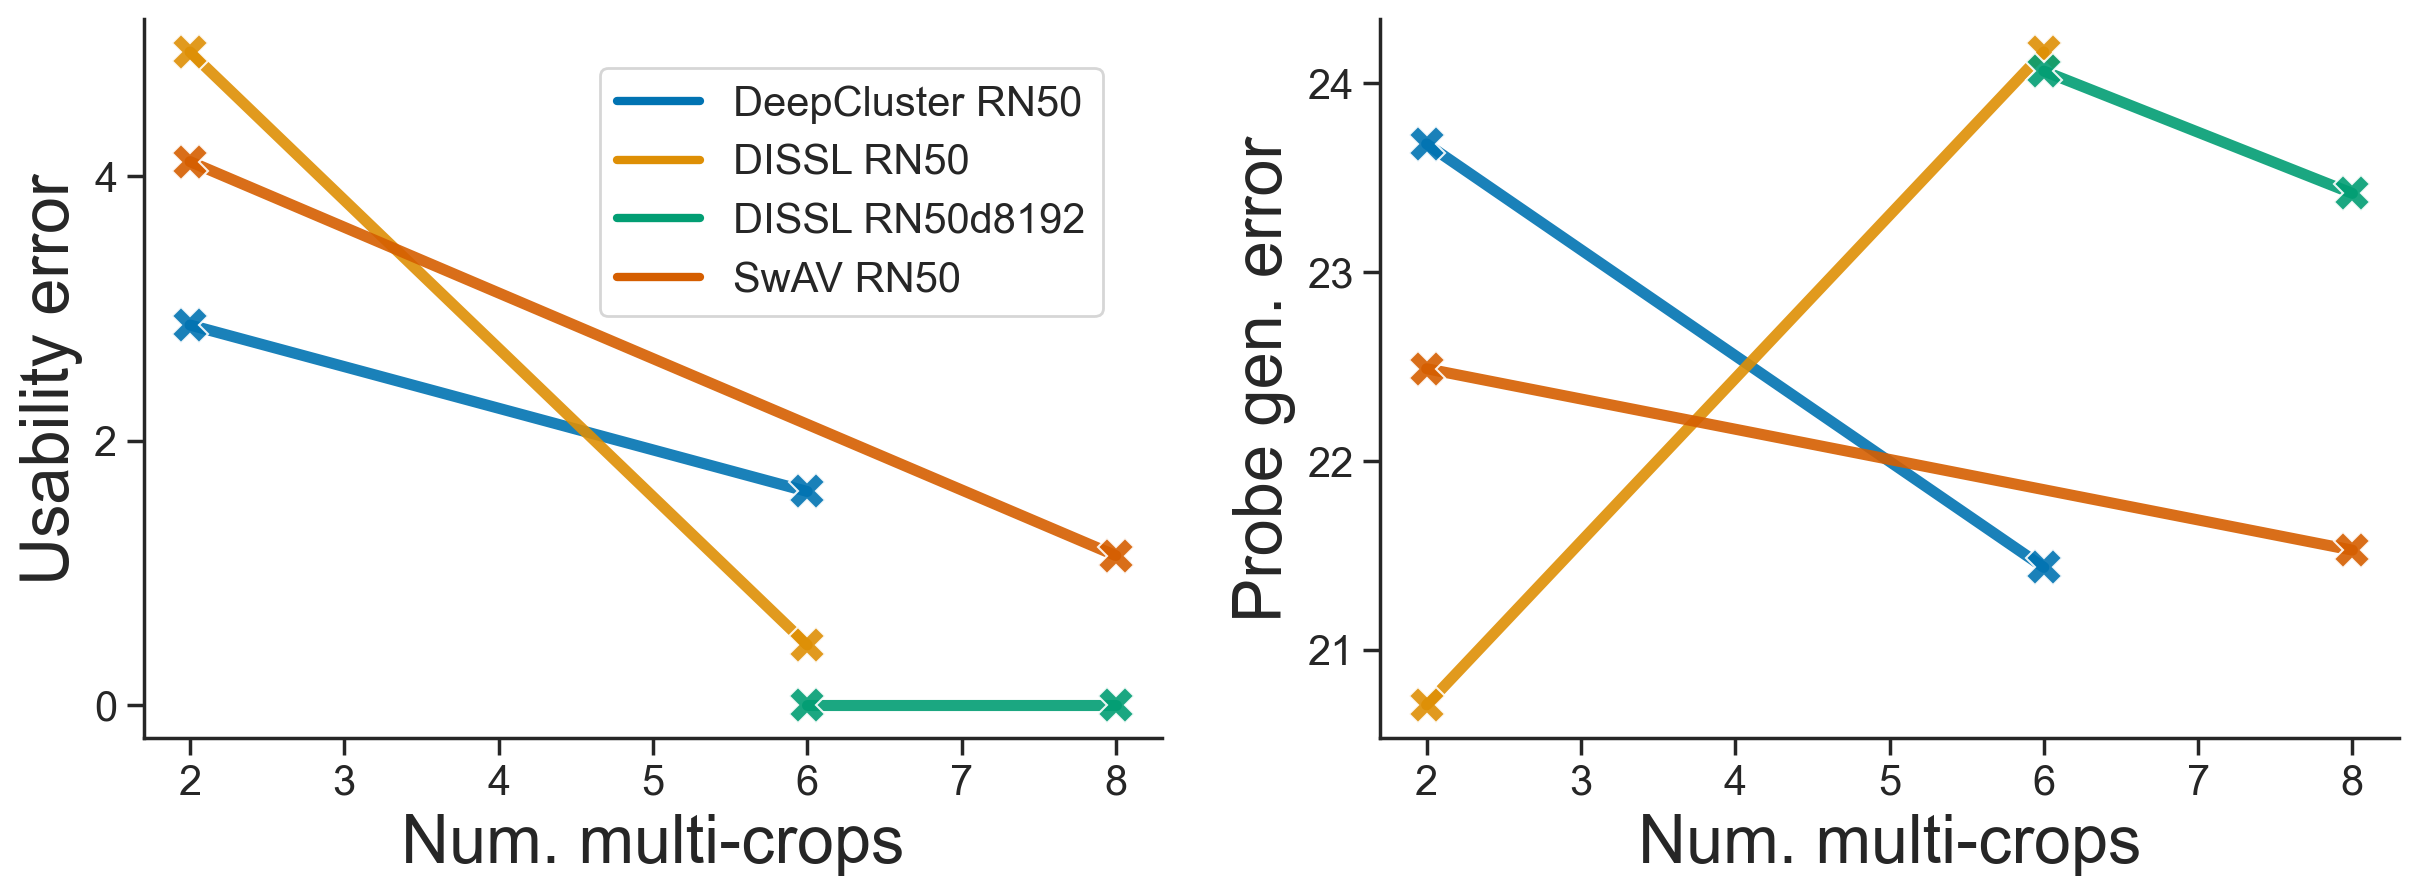

<Figure size 640x480 with 0 Axes>

In [47]:


df_nviews = melt(get_only_vary(df, ["nviews"], core_params),  components=to_fit)
df_nviews["nviews"] = df_nviews["nviews"].astype(int)


with plot_config(font_scale=2, rc={'lines.linewidth': 3, 'font.family': 'sans-serif',"xtick.labelsize": 15,"ytick.labelsize": 15,"legend.fontsize": 15}):
    g = sns.relplot(data=prettify_df(df_nviews.query("component.isin(@components_to_plot)")), 
                    x=PRETTY_RENAMER["nviews"], 
                    y=PRETTY_RENAMER["value"], 
                    hue=PRETTY_RENAMER["non_vary"], 
                    col=PRETTY_RENAMER["component"],
                    kind="line",
                    legend=True,
                    marker="X",
                    markersize=13,
                    linewidth=4,
                    alpha=0.9,
                    aspect=0.8,
                    err_style=None, # removing
                    facet_kws={'sharey': False}
                   )
    g.set_titles('')
    #g.set_titles('{col_name}')
    #g.set(xscale="log")
    #plt.setp(g._legend.get_texts())
    sns.move_legend(g, "upper left", bbox_to_anchor=(0.25, .9), title=None, frameon=True)
    
    for t, l in zip(g._legend.texts, ["DeepCluster RN50","DISSL RN50","DISSL RN50d8192","SwAV RN50"]):
        t.set_text(l)
    
    g.set(xlabel="Num. multi-crops")
    
    axes = g.axes.flatten()
    axes[0].set_ylabel("Usability error")
    axes[1].set_ylabel("Probe gen. error")
    axes[0].yaxis.set_major_locator(plt.MaxNLocator(3))
    axes[1].yaxis.set_major_locator(plt.MaxNLocator(4))
        
    plt.tight_layout()
    
    plt.show()
    save_fig(g, f"figures/nviews/nviews_controlled.pdf")   

### Architerture

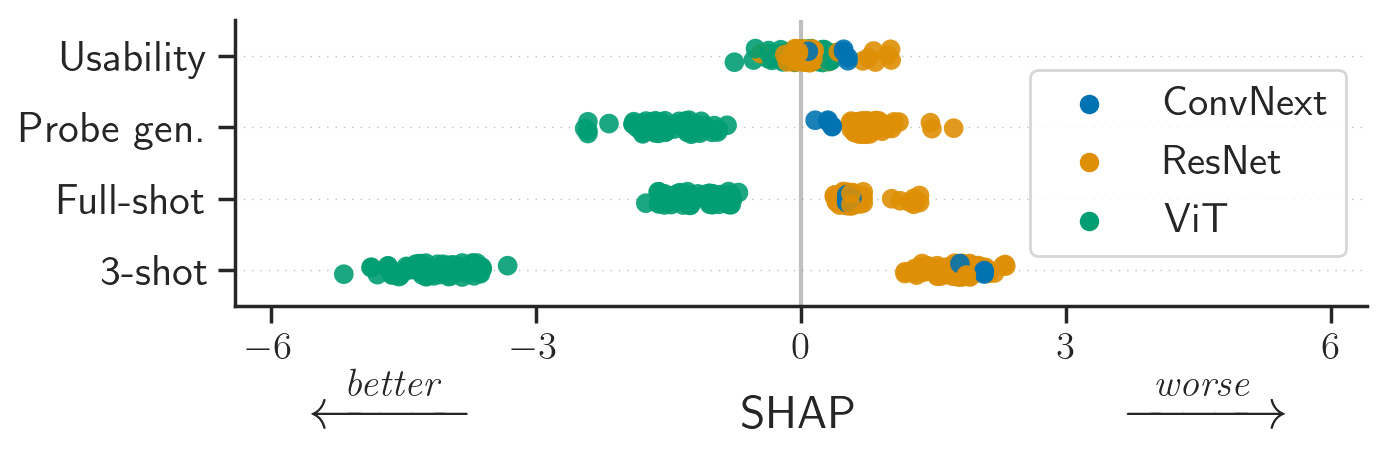

<Figure size 640x480 with 0 Axes>

In [48]:
rc={'lines.linewidth': 2, "xtick.labelsize": 14, "legend.fontsize": 15, 
                               "text.latex.preamble": r'\usepackage{amsmath} \usepackage{mathtools}'}

with plot_config(font_scale=1.4, is_use_tex=True, rc=rc):
    
                                  
    g,other=plot_shap_components("family", df_shap_main["nano"], aspect=3, height=2.5, alpha=0.9, s=50, facet_kws=dict(legend_out=False),
                                config_kwargs=dict(is_use_tex=True), rc=rc
                               )

    g.set(xlabel=r"{\huge $\xleftarrow{\ \mathit{better} \ } $} \hspace*{3cm} SHAP \hspace*{3cm}  {\huge $\xrightarrow{\ \mathit{worse} \ } $}",
         xlim=[-6.4,6.4])
    
    g.ax.xaxis.set_major_locator(plt.MaxNLocator(5))
    
    plt.show(g)
    save_fig(g, f"figures/architecture/family_shap.pdf")

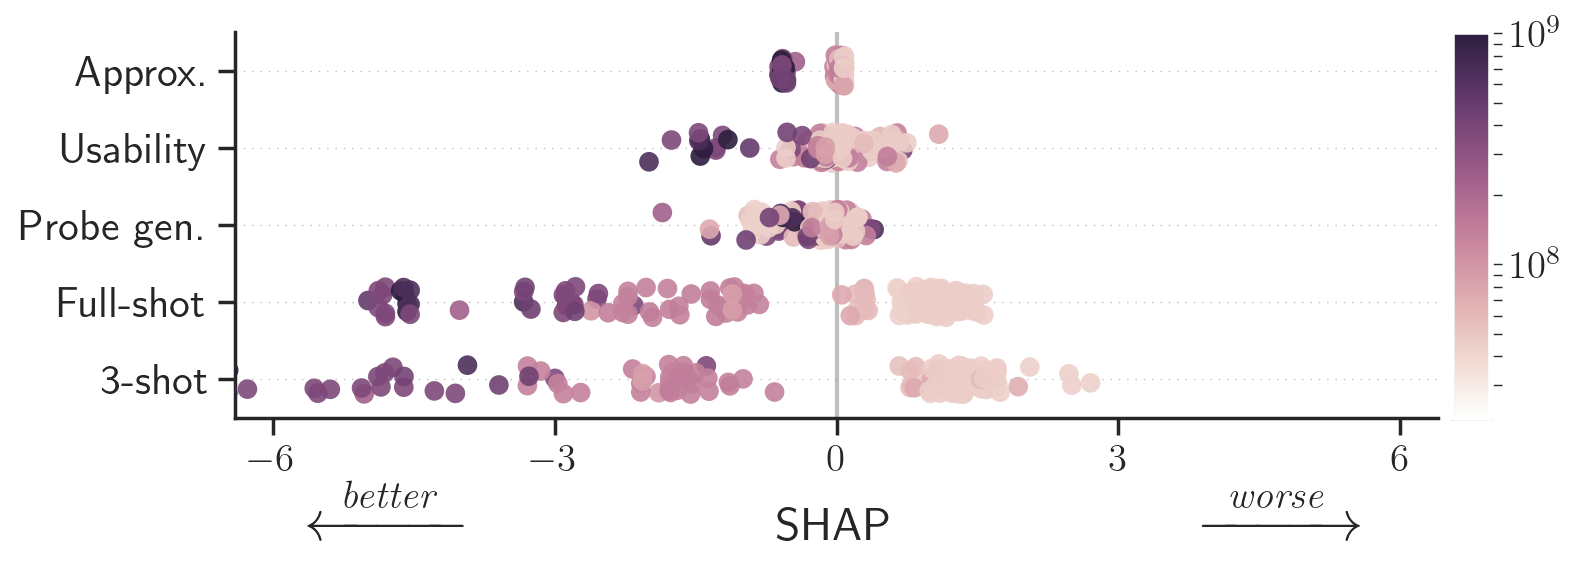

<Figure size 640x480 with 0 Axes>

In [49]:
col="n_parameters"
rc={'lines.linewidth': 2, "xtick.labelsize": 14, "legend.fontsize": 14,  "text.latex.preamble": r'\usepackage{amsmath} \usepackage{mathtools}'}
with plot_config(font_scale=1.4, is_use_tex=True, rc=rc ):
    
    g, other=plot_shap_components(col,  df_shap_tofit["min"].query("component != 'enc_gen'"), 
                                  config_kwargs=dict(is_use_tex=True),  rc=rc,
                           s=50, aspect=3, height=3, is_colorbar=True, alpha=0.9,hue_norm=LogNorm(), jitter=0.2)

    g.set(xlabel=r"{\huge $\xleftarrow{\ \mathit{better} \ } $} \hspace*{3.5cm} SHAP \hspace*{3.5cm}  {\huge $\xrightarrow{\ \mathit{worse} \ } $}",
         xlim=[-6.4,6.4])
    
    # other["colorbar"].formatter.set_powerlimits((0, 0))
    # other["colorbar"].ax.yaxis.offsetText.set_fontsize(12)
    other["colorbar"].ax.yaxis.offsetText.set(ha="center")
    g.ax.xaxis.set_major_locator(plt.MaxNLocator(5))
    
    plt.show(g)
    save_fig(g, "figures/architecture/size_shap.pdf")


### Objective

In [50]:
ssl_mode_cat = ['transform',
 'generative',
 'contrastive',
 'siamese',
 'hierarchical',
 'clustering']

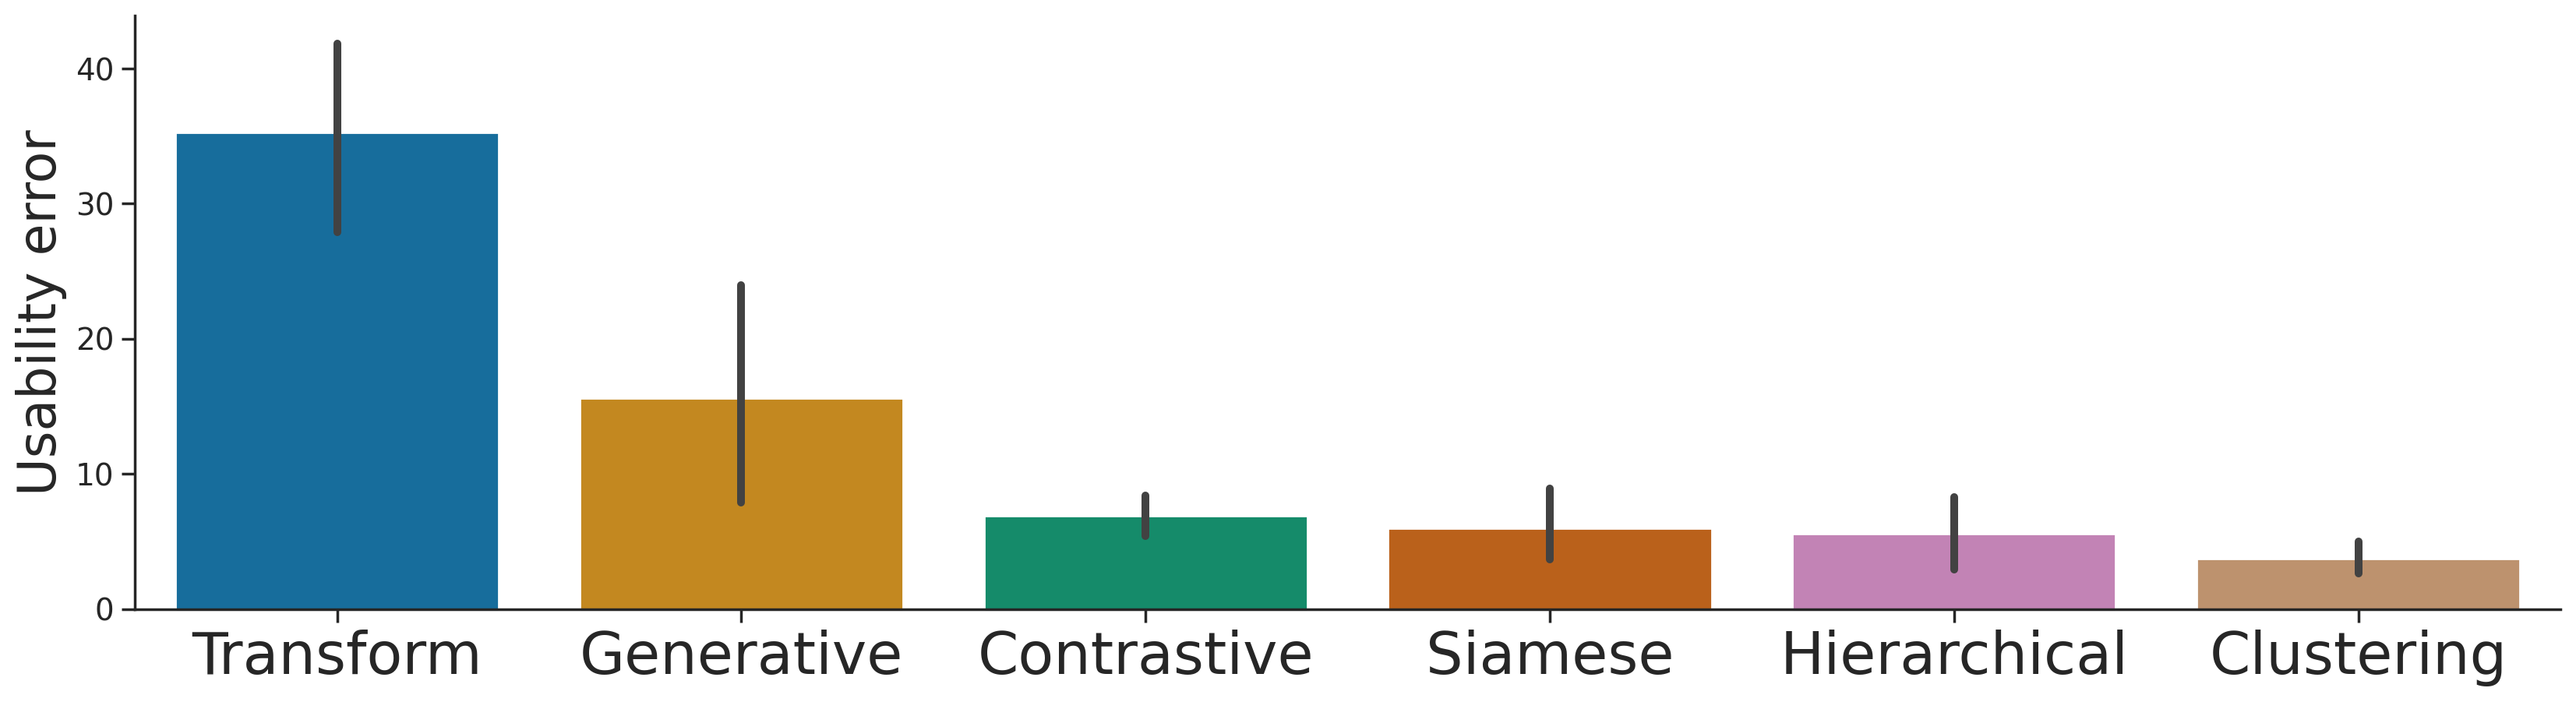

In [51]:
with plot_config(font_scale=2, rc={'lines.linewidth': 2, 'font.family': 'sans-serif', "xtick.labelsize": 27, "ytick.labelsize": 14}):
    curr_df = df.copy()
    curr_df.ssl_mode = curr_df.ssl_mode.astype("category").cat.reorder_categories(ssl_mode_cat)
    
    fig, ax = plt.subplots(1,1, figsize=(17, 5))
    ax=sns.barplot(data=prettify_df(curr_df), y="Usability",  x="SSL Mode", ax=ax)
    #plt.setp(ax.get_xticklabels(), rotation=20) #ha="right"
    #plt.tight_layout()
    ax.set_ylabel("Usability error")
    ax.set_xlabel("")
    ax.yaxis.set_major_locator(plt.MaxNLocator(5))
    plt.tight_layout()
    

plt.show()
save_fig(ax, f"figures/objective/obj_usability_global.pdf")

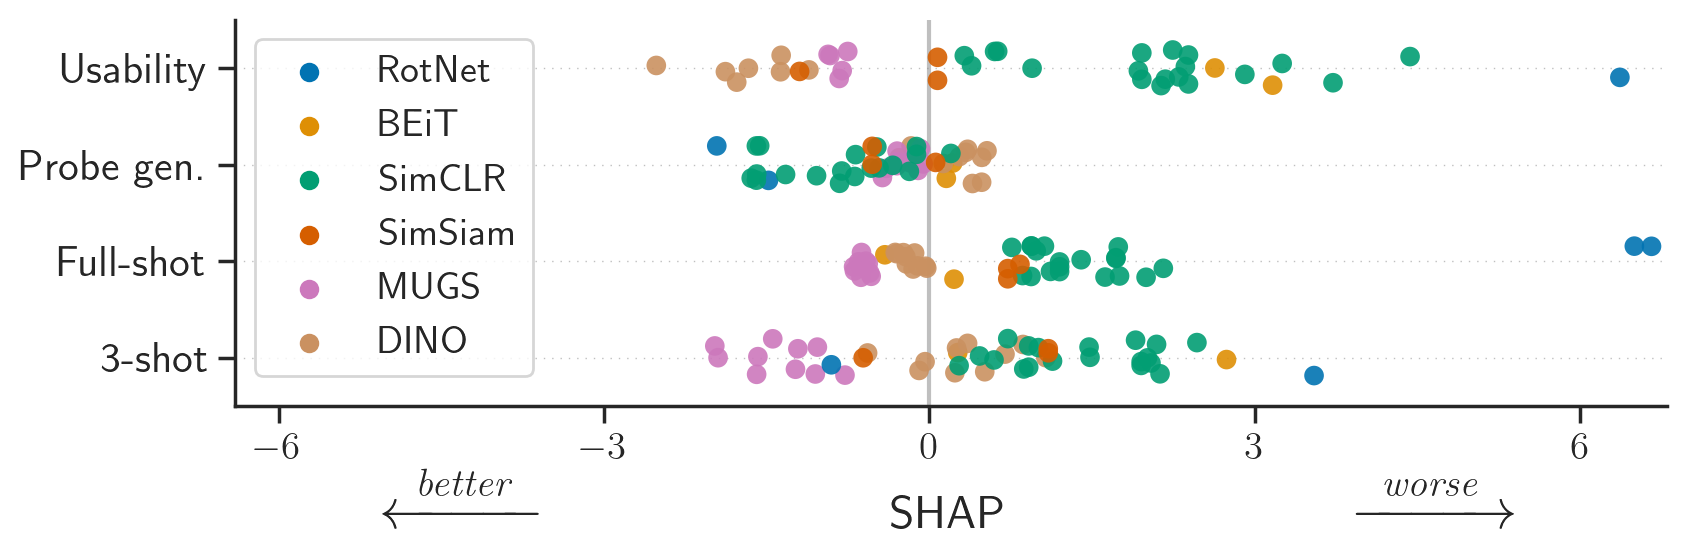

<Figure size 640x480 with 0 Axes>

In [52]:
objective_to_keep=["rotnet","beit","simclr","simsiam", "mugs","dino"]


#palette = sns.color_palette("Set2", n_colors=len(objective_to_keep))
curr_df = df_shap_main["min"].query("objective.isin(@objective_to_keep)").query("version == 1").copy()
curr_df.shap_objective += curr_df.shap_ssl_mode # shap is additive so if you want effect of objective you should add ssl_mode which is a function of objective
curr_df.objective = curr_df.objective.cat.remove_unused_categories().cat.reorder_categories(objective_to_keep)

rc={'lines.linewidth': 2, "xtick.labelsize": 14, "legend.fontsize": 14,  "text.latex.preamble": r'\usepackage{amsmath} \usepackage{mathtools}'}
with plot_config(font_scale=1.4, is_use_tex=True, rc=rc ):

    g,other=plot_shap_components("objective", curr_df,  aspect=3, height=3, s=50, alpha=0.9, jitter=0.2, 
                                 rc=rc,config_kwargs=dict(is_use_tex=True), facet_kws=dict(legend_out=False) )
    
    g.set(xlabel=r"{\huge $\xleftarrow{\ \mathit{better} \ } $} \hspace*{4cm} SHAP \hspace*{4cm}  {\huge $\xrightarrow{\ \mathit{worse} \ } $}",
         xlim=[-6.4,6.8])
    g.ax.xaxis.set_major_locator(plt.MaxNLocator(5))
    
    plt.show(g)
    save_fig(g, f"figures/objective/main_objectives.pdf")


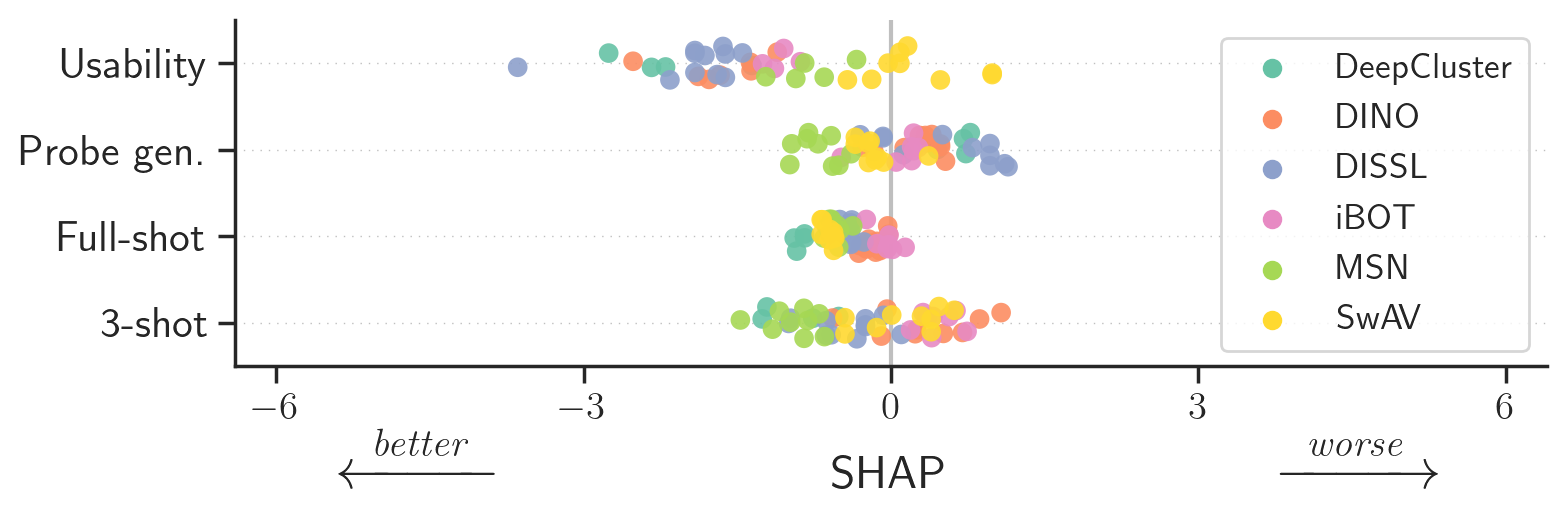

<Figure size 640x480 with 0 Axes>

In [53]:
objectives = df.query("ssl_mode == 'clustering'").objective.value_counts().to_frame().query("objective > 2").index

#palette = sns.color_palette("Set2", n_colors=len(objective_to_keep))
curr_df = df_shap_main["min"].query("objective in @objectives").copy()
curr_df.shap_objective += curr_df.shap_ssl_mode 
curr_df.objective = curr_df.objective.cat.remove_unused_categories()

rc={'lines.linewidth': 2, "xtick.labelsize": 14, "legend.fontsize": 13,  "text.latex.preamble": r'\usepackage{amsmath} \usepackage{mathtools}'}
with plot_config(font_scale=1.4, is_use_tex=True, rc=rc ):

    palette = sns.color_palette("Set2", n_colors=len(objectives))
    g,other=plot_shap_components("objective", curr_df,  aspect=3, height=2.8, s=50, alpha=0.9, jitter=0.2, rc=rc,config_kwargs=dict(is_use_tex=True),
                                palette=palette, facet_kws=dict(legend_out=False))
    
    
    g.set(xlabel=r"{\huge $\xleftarrow{\ \mathit{better} \ } $} \hspace*{3.8cm} SHAP \hspace*{3.8cm}  {\huge $\xrightarrow{\ \mathit{worse} \ } $}",
         xlim=[-6.4,6.4])
    g.ax.xaxis.set_major_locator(plt.MaxNLocator(5))
    
    plt.show(g)
    save_fig(g, f"figures/objective/main_clustering_objectives.pdf")


#### Projection head 

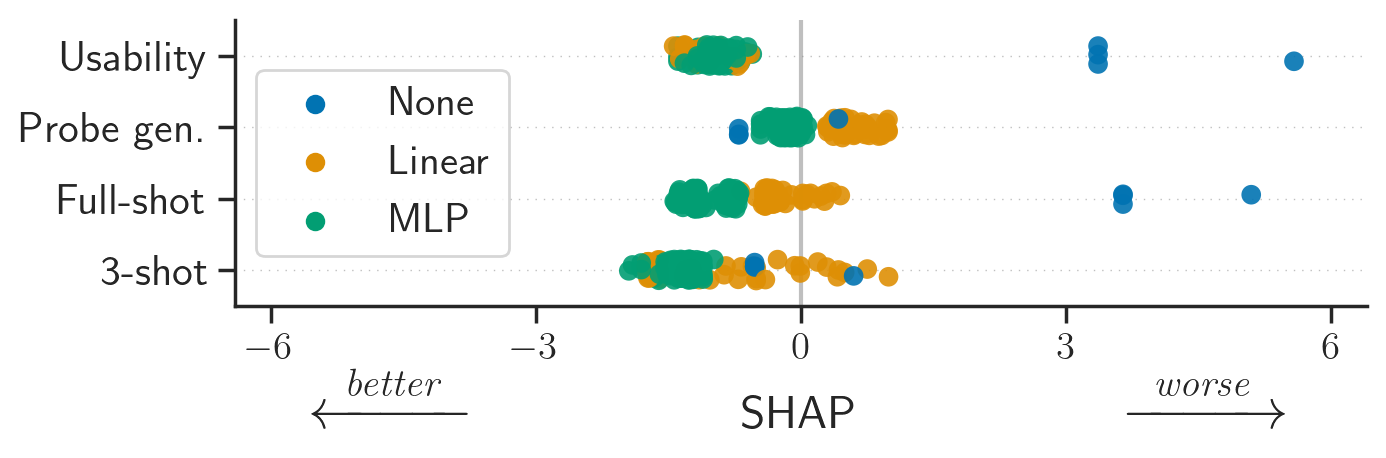

<Figure size 640x480 with 0 Axes>

In [54]:
rc={'lines.linewidth': 2, "xtick.labelsize": 14, "legend.fontsize": 15, 
                               "text.latex.preamble": r'\usepackage{amsmath} \usepackage{mathtools}'}

with plot_config(font_scale=1.4, is_use_tex=True, rc=rc):
    
                                  
    g,other=plot_shap_components("projection2_arch", df_shap_main["min"], aspect=3, height=2.5, alpha=0.9, s=50, facet_kws=dict(legend_out=False), jitter=0.15,
                                config_kwargs=dict(is_use_tex=True), rc=rc
                               )

    g.set(xlabel=r"{\huge $\xleftarrow{\ \mathit{better} \ } $} \hspace*{3cm} SHAP \hspace*{3cm}  {\huge $\xrightarrow{\ \mathit{worse} \ } $}",
         xlim=[-6.4,6.4])
    
    g.ax.xaxis.set_major_locator(plt.MaxNLocator(5))
    
    plt.show(g)
    save_fig(g, f"figures/projection/projection_shap.pdf")
    

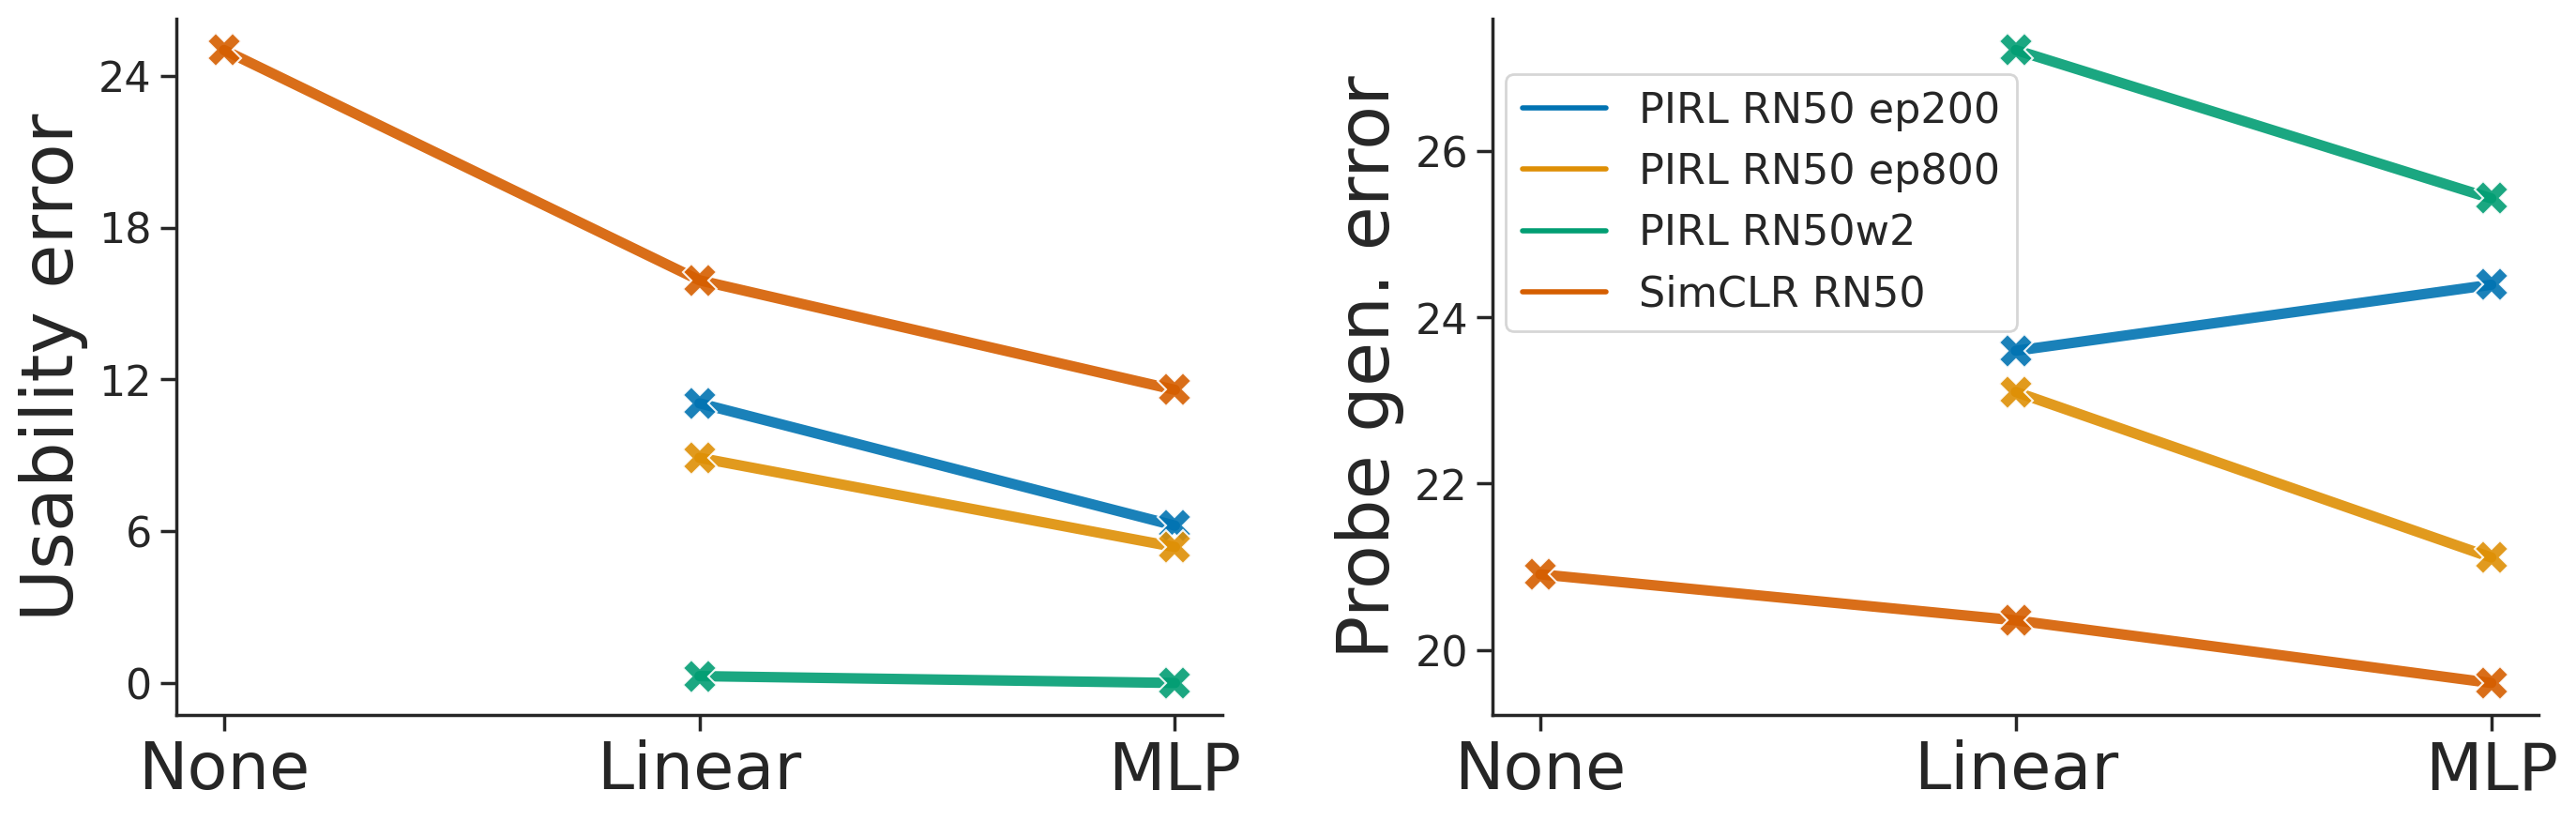

In [55]:
df_proj = melt(get_only_vary(df, ["projection_same","projection1_arch","projection2_arch"], 
                             core_params), components=to_fit).query("objective != 'dissl'")


df_proj.projection2_arch = pd.Categorical(df_proj.projection2_arch, ["identity","linear","mlp"])


with plot_config(font_scale=2.3, rc={'lines.linewidth': 2, "ytick.labelsize": 16,"legend.fontsize": 16}):
    g = sns.relplot(data=prettify_df(df_proj.query("component.isin(@components_to_plot)")), 
                    x=PRETTY_RENAMER["projection2_arch"], 
                    y=PRETTY_RENAMER["value"], 
                    hue=PRETTY_RENAMER["non_vary"], 
                    col=PRETTY_RENAMER["component"],
                    kind="line",
                    marker="X",
                    markersize=13,
                    alpha=0.9,
                    linewidth=4,
                    aspect=0.8,
                    legend=True,
                    err_style=None, # removing
                    facet_kws={'sharey': False}
                   )
    #g.set_titles('{col_name}')
    g.set(xlabel="")
    g.set_titles('')
    axes = g.axes.flatten()
    axes[0].set_ylabel("Usability error")
    axes[1].set_ylabel("Probe gen. error")
    
    sns.move_legend(g, "upper left", bbox_to_anchor=(0.565, .88), title=None, frameon=True)
    
    for t, l in zip(g._legend.texts, ["PIRL RN50 ep200","PIRL RN50 ep800","PIRL RN50w2","SimCLR RN50"]):
        t.set_text(l)
    
    for ax in axes:
        ax.yaxis.set_major_locator(plt.MaxNLocator(5))
        
    plt.tight_layout()
    
    #plt.setp(g._legend.get_texts(), fontsize=12)
plt.show()
save_fig(g, f"figures/projection/proj_controlled.pdf")

### All results

In [56]:
curr_df = df.copy()
curr_df["arch"] = df.architecture + "_"+ df.patch_size.astype(str) #+"_"+ df.z_layer.astype(str)
curr_metrics = ['train_test','train-balsbst-ntrain0.01_test','train-nperclass-3_test']

In [57]:
categories = ["objective == 'clip' & arch == 'vitl_14' ",
             ]

best_res = collect_best_acc_by_cat(curr_df, curr_metrics, categories, keep=["is_our_extract","n_parameters"])
best_res.index = pd.MultiIndex.from_tuples(best_res.index.str.split(' ').tolist())#, names=["obj.","arch."]
best_res["Num. Param."] = (best_res["Num. Param."] / 1e6).round().astype(int).astype(str) + "M"
best_res=best_res.set_index("Num. Param.", append=True)
best_res.index.names = ["Obj.","Arch.","Param."] # [None]*3
best_res

Full-shot     1\%  3-shot  Is Our Extract  Category
Obj. Arch.   Param.                                                     
CLIP ViT-L14 304M    84.897999  75.862  64.060            True         0
             304M    85.074000  72.748  57.476            True         0

In [58]:
categories = ["objective == 'clip' & arch == 'vitl_14' ",
             ]

best_res = collect_best_acc_by_cat(curr_df, curr_metrics, categories, n=100,keep=["is_our_extract","n_parameters"])
best_res.index = pd.MultiIndex.from_tuples(best_res.index.str.split(' ').tolist())#, names=["obj.","arch."]
best_res["Num. Param."] = (best_res["Num. Param."] / 1e6).round().astype(int).astype(str) + "M"
best_res=best_res.set_index("Num. Param.", append=True)
best_res.index.names = ["Obj.","Arch.","Param."] # [None]*3
best_res

Full-shot     1\%  3-shot  Is Our Extract  Category
Obj.     Arch.   Param.                                                     
CLIP     ViT-L14 304M    85.050000  75.494  63.564            True         0
Openclip ViT-L14 304M    83.346000  74.188  62.648           False         0
CLIP     ViT-L14 304M    85.048001  74.636  60.694            True         0
                 303M    84.536000  74.468  62.044           False         0
                 304M    84.990001  75.224  62.930           False         0
                 304M    84.897999  75.862  64.060            True         0
                 304M    85.074000  72.748  57.476            True         0

In [59]:
categories = [#"year < 2018",
              "arch == 'resnet50_7' & pretraining_data == 'ImageNet-1K' ",
              "family != 'vit' & pretraining_data == 'ImageNet-1K'",
              "arch == 'vits_16' & pretraining_data == 'ImageNet-1K'",
              "family == 'vit' & pretraining_data == 'ImageNet-1K' ",
              #"year > 2015" # all
              "is_our_extract == False"
             ]

best_res = collect_best_acc_by_cat(curr_df, curr_metrics, categories, keep=["is_our_extract","n_parameters"])
best_res.index = pd.MultiIndex.from_tuples(best_res.index.str.split(' ').tolist())#, names=["obj.","arch."]
best_res["Num. Param."] = (best_res["Num. Param."] / 1e6).round().astype(int).astype(str) + "M"
best_res=best_res.set_index("Num. Param.", append=True)
best_res.index.names = ["Obj.","Arch.","Param."] # [None]*3
best_res

Full-shot     1\%  3-shot  Is Our Extract  \
Obj.     Arch.      Param.                                              
DINO     RN50       24M     74.171999  52.886  35.936           False   
MoCo-v3  RN50       24M     73.740000  55.544  40.424           False   
VICRegL  ConvNext-B 85M     74.757999  64.342  56.288           False   
SwAV     RN50w4     375M    76.240000  56.196  36.894           False   
MSN      ViT-S16    22M     76.108000  67.494  60.356           False   
MUGS     ViT-S16    22M     77.310000  62.872  49.642           False   
         ViT-L16    303M    80.884001  73.980  68.514           False   
MSN      ViT-B4     86M     80.094001  75.136  69.296           False   
         ViT-L7     303M    79.906000  74.930  69.838           False   
CLIP     ViT-L14    304M    84.990001  75.224  62.930           False   
Openclip ViT-H14    632M    84.412000  75.772  63.700           False   

                            Category  
Obj.     Arch.      Param.            
DINO     RN50       24M            0  
MoCo-v3  RN50       24M            0  
VICRegL  ConvNext-B 85M            1  
SwAV     RN50w4     375M           1  
MSN      ViT-S16    22M            2  
MUGS     ViT-S16    22M            2  
         ViT-L16    303M           3  
MSN      ViT-B4     86M            3  
         ViT-L7     303M           3  
CLIP     ViT-L14    304M           4  
Openclip ViT-H14    632M           4

In [60]:

caption = """Best performing models for linear probes trained using varying ImageNet examples (columns).
The first 4 categories of rows show models pretrained on ImageNet-1K of various architectures (RN50, any CNN, ViT-B/16, any ViT).
The last set of rows allows any data and architecture.
Underlined results are best in their category, 
bolded ones are best overall.
Duplicate rows are removed."""
print(best_res.drop(columns=["Is Our Extract","Category"]).style.format(precision=1).to_latex(hrules=True, label="tab:best_results", position="h",
                                                                                       sparse_index=False, caption=caption))


\begin{table}[h]
\caption{Best performing models for linear probes trained using varying ImageNet examples (columns).
The first 4 categories of rows show models pretrained on ImageNet-1K of various architectures (RN50, any CNN, ViT-B/16, any ViT).
The last set of rows allows any data and architecture.
Underlined results are best in their category, 
bolded ones are best overall.
Duplicate rows are removed.}
\label{tab:best_results}
\begin{tabular}{lllrrr}
\toprule
 &  &  & Full-shot & 1\% & 3-shot \\
Obj. & Arch. & Param. &  &  &  \\
\midrule
DINO & RN50 & 24M & 74.2 & 52.9 & 35.9 \\
MoCo-v3 & RN50 & 24M & 73.7 & 55.5 & 40.4 \\
VICRegL & ConvNext-B & 85M & 74.8 & 64.3 & 56.3 \\
SwAV & RN50w4 & 375M & 76.2 & 56.2 & 36.9 \\
MSN & ViT-S16 & 22M & 76.1 & 67.5 & 60.4 \\
MUGS & ViT-S16 & 22M & 77.3 & 62.9 & 49.6 \\
MUGS & ViT-L16 & 303M & 80.9 & 74.0 & 68.5 \\
MSN & ViT-B4 & 86M & 80.1 & 75.1 & 69.3 \\
MSN & ViT-L7 & 303M & 79.9 & 74.9 & 69.8 \\
CLIP & ViT-L14 & 304M & 85.0 & 75.2 & 62.9 \\
O